# OpenClassrooms - Projet 2
## *Préparez des données pour un organisme de santé publique*
### Open Food Facts
- **[Site officiel](https://world.openfoodfacts.org/)**
- **[Lien vers le dataset](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip)**

## Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Je précise le type de certaines colonnes au moment de l'importation
# pour éviter un message d'erreur DtypeWarning (mixed types)
dtype_colonne = {
                'code': object,
                'created_t': object,
                'last_modified_t': object,
                'manufacturing_places': object,
                'manufacturing_places_tags': object,
                'emb_codes': object,
                'emb_codes_tags': object,
                'first_packaging_code_geo': object,
                'cities': object,
                'cities_tags': object,
                'allergens': object,
                'allergens_fr': object,
                'traces': object,
                'traces_tags': object,
                'traces_fr': object,
                'ingredients_from_palm_oil_tags': object,
                }

data_raw = pd.read_csv("fr.openfoodfacts.org.products.csv", dtype=dtype_colonne, sep='\t')
#data_raw = pd.read_csv("en.openfoodfacts.org.products.csv", dtype=dtype_colonne, sep='	')

print('Importation terminée')

Importation terminée


## Premier aperçu du dataset

In [3]:
print("Premières lignes : ")
display(data_raw.head())


"""print("Dernières lignes")
display(data_raw.tail())
print("\n", ("#"*80), "\n")"""

print("Résumé des valeurs numériques : ")
display(data_raw.describe())


print("- Le dataset contient", data_raw.shape[0], "lignes et", data_raw.shape[1], "colonnes.")
print("- Il y a", data_raw.duplicated().sum(), "lignes en doubles.")

colonnes_vides = data_raw.columns[data_raw.nunique() == 0]
print("-", len(colonnes_vides), "colonnes du dataset sont entièrement vides :")
display(colonnes_vides.tolist())

# verbose = True pour afficher toutes les colonnes
data_raw.info()

Premières lignes : 


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Résumé des valeurs numériques : 


,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


- Le dataset contient 320772 lignes et 162 colonnes.
- Il y a 0 lignes en doubles.
- 16 colonnes du dataset sont entièrement vides :


['no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'melissic-acid_100g',
 'elaidic-acid_100g',
 'mead-acid_100g',
 'erucic-acid_100g',
 'nervonic-acid_100g',
 'chlorophyl_100g',
 'glycemic-index_100g',
 'water-hardness_100g']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


## Les données manquantes sont très nombreuses

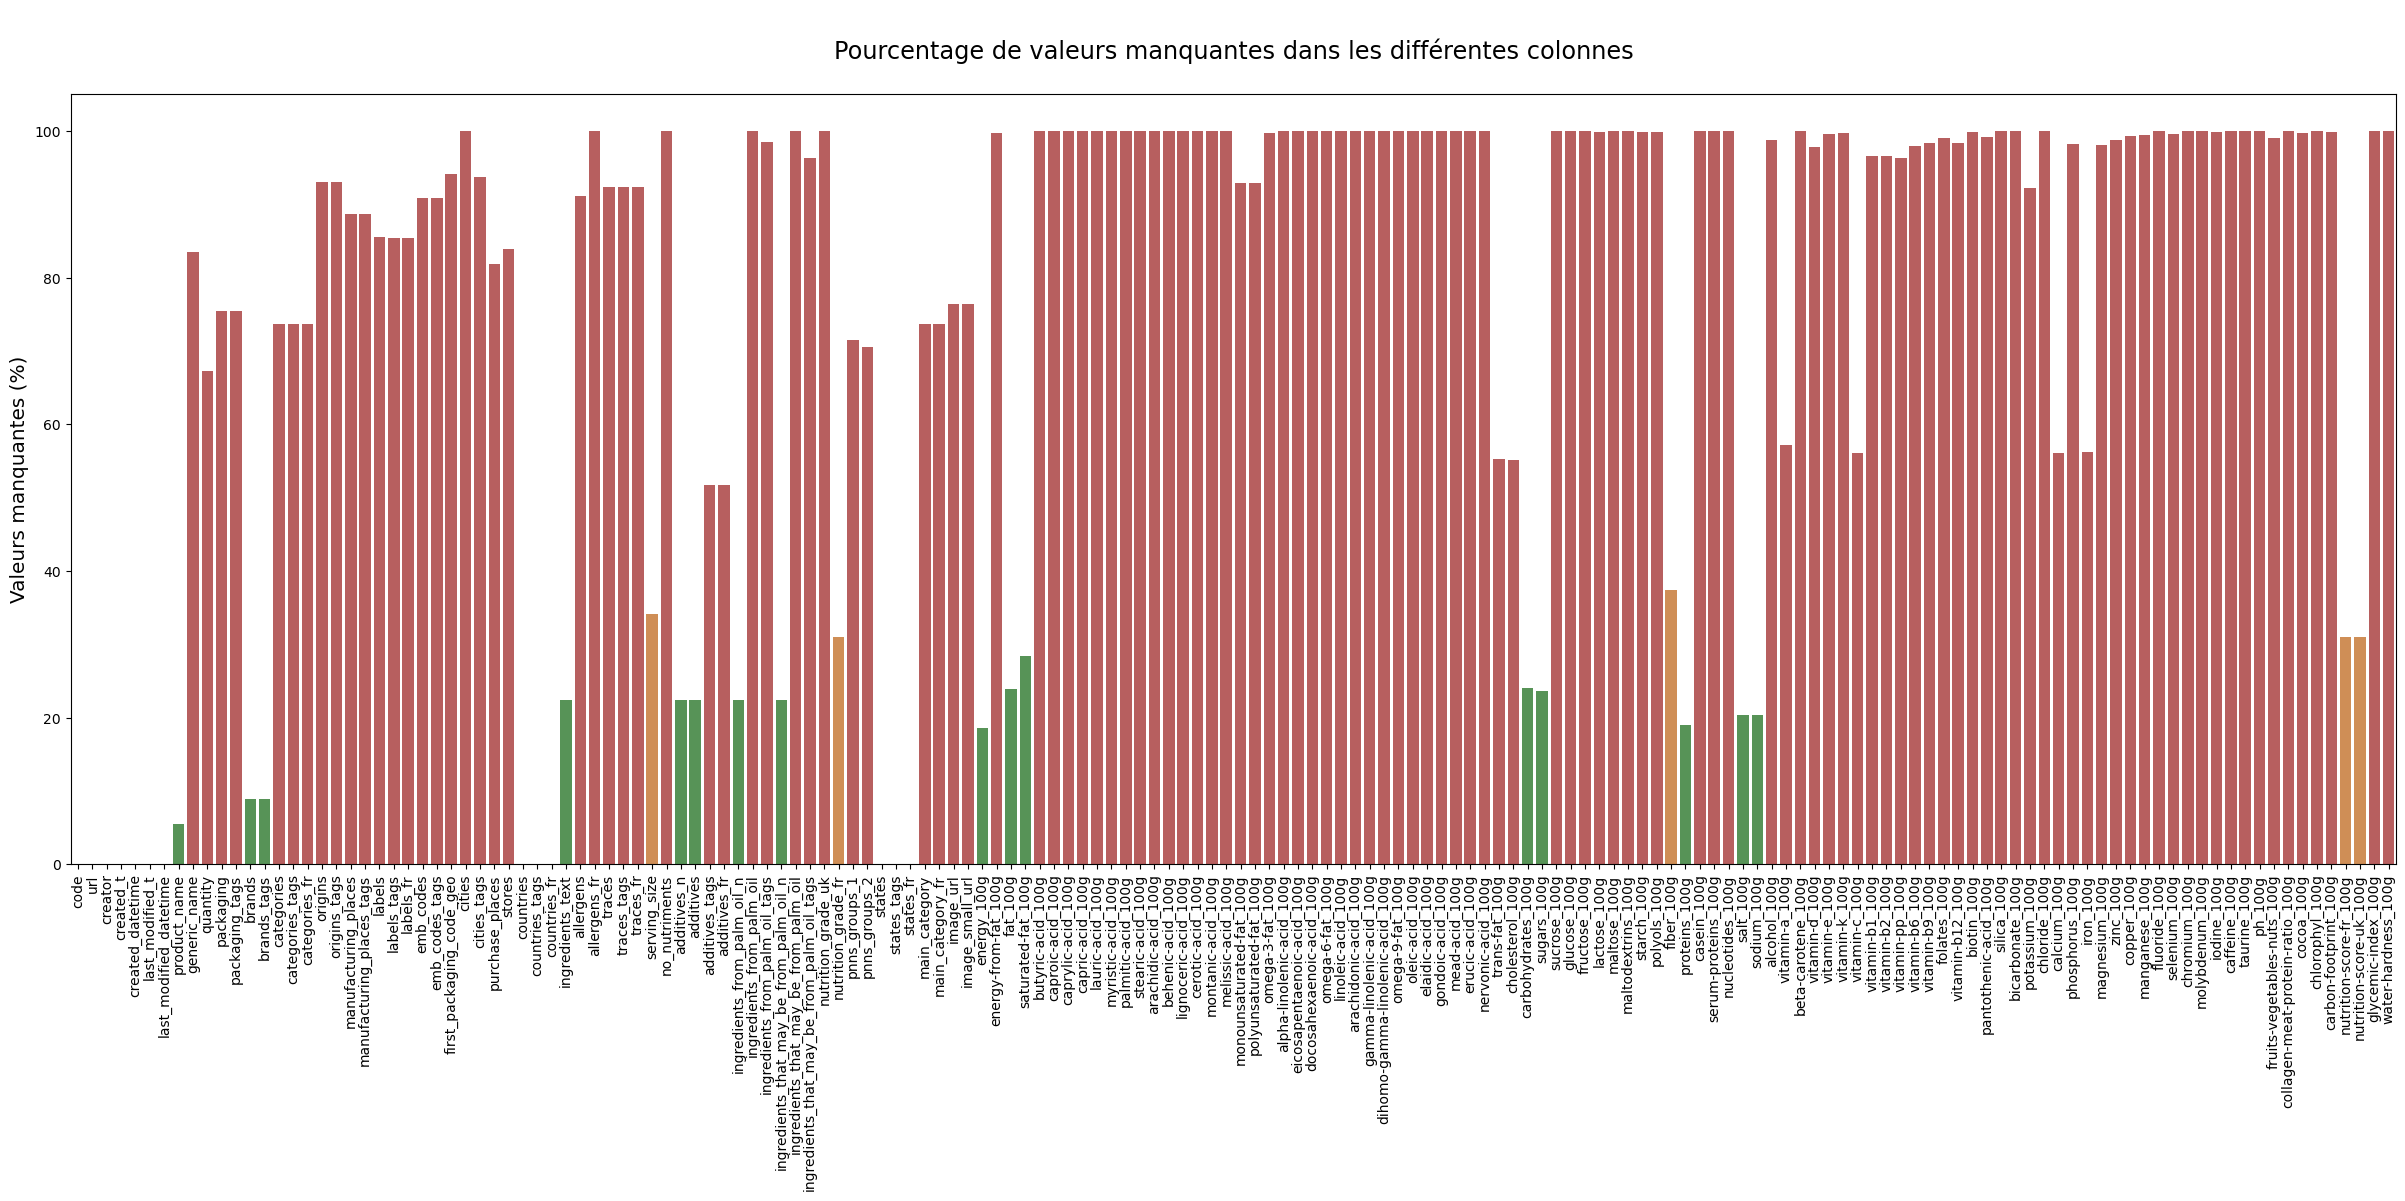

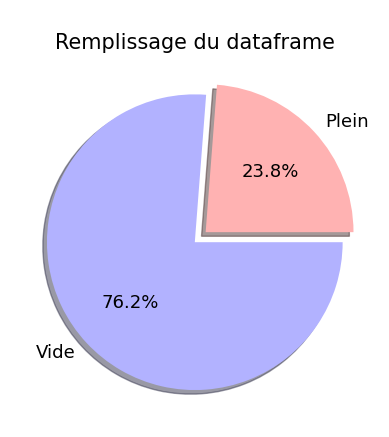


Il y a 128 colonnes avec plus de 50 % de données manquantes.


In [4]:
colonnes_incompletes = data_raw.isna().mean()

fig, ax = plt.subplots(figsize=(30,10))

# Création d'une palette personnalisée
colors = [{p<0.5: '#3A923A', 0.3<=p<=0.5: '#E1812C', p>0.5: '#C03D3E'}[True] for p in colonnes_incompletes.values.tolist()]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x=colonnes_incompletes.index, y=colonnes_incompletes.values*100, alpha = 0.9)

plt.xticks(rotation=90)
ax.set_title('\nPourcentage de valeurs manquantes dans les différentes colonnes\n', fontsize='xx-large')
ax.set_ylabel('Valeurs manquantes (%)', fontsize='x-large')

plt.show()

vide = data_raw.isnull().sum().sum() # Somme de la somme des NaN de chaque colonne
plein = data_raw.notnull().sum().sum() # Somme de la somme des non NaN de chaque colonne

labels = 'Plein', 'Vide'
sizes = [plein, vide]

colors=['#FFB2B2', '#B2B2FF']
explode = (0.1, 0)  # j'explose seulement les allergènes et traces

fig, ax = plt.subplots()
plt.title("\nRemplissage du dataframe", fontsize=15)
ax.pie(sizes, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', colors=colors, textprops={'color':"black", 'fontsize':13});
plt.show()

print("\nIl y a", len(colonnes_incompletes[colonnes_incompletes.values > 0.5]), "colonnes avec plus de 50 % de données manquantes.")

# Nettoyage

### Traitement de la colonne *code*

In [5]:
print("Il y a", data_raw['code'].isnull().sum(), "valeurs nulles dans la colonne code.")

# Suppression des lignes où 'code' est NaN
if data_raw['code'].isnull().sum() > 0:
    data_raw = data_raw[data_raw['code'].notna()]
    print("Valeurs nulles supprimées.")

print("Il y a", data_raw['code'].duplicated().sum(), "doubles dans la colonne code")


Il y a 23 valeurs nulles dans la colonne code.
Valeurs nulles supprimées.
Il y a 0 doubles dans la colonne code


### Traitement du nom des colonnes *biotin_100g* & *pantothenic-acid_100g*

biotin_100g est aussi appelée Vitamine B8<br>
pantothenic-acid_100g est aussi appelée Vitamine B5<br>
Cf la [doc des variables](https://world.openfoodfacts.org/data/data-fields.txt)<br>
Afin d'uniformiser les noms des colonnes des vitamines, on va les renommer.

In [6]:
data_raw.rename(columns={"biotin_100g": "vitamin-b8_100g", "pantothenic-acid_100g": "vitamin-b5_100g"}, errors="ignore", inplace=True)

### Suppression des colonnes avec plus de 90% de valeurs manquantes

In [7]:
colonnes_vides = data_raw.columns[data_raw.isnull().sum()/len(data_raw) >= 0.9]

# Si on veut conserver certaines colonnes malgré tout
colonnes_a_conserver = ['nutrition_grade_uk', 'water-hardness_100g', 'allergens', 'traces'] # + [x for x in data_raw.columns if  '_100g' in x]

# Colonnes à supprimer, moins les colonnes qu'on veut conserver
colonnes_vides = [x for x in colonnes_vides if x not in colonnes_a_conserver]

data_clean = data_raw.drop(columns=colonnes_vides)

print("Colonnes supprimées : ")
print(colonnes_vides)

Colonnes supprimées : 
['origins', 'origins_tags', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'allergens_fr', 'traces_tags', 'traces_fr', 'no_nutriments', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'energy-from-fat_100g', 'butyric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 'oleic-acid_

### Sélection des colonnes qui nous intéressent

In [8]:
colonnes_diverses = [
                    'code',
                    'created_datetime',
                    'product_name',
                    'brands_tags',
                    'countries_tags',
                    'ingredients_text',
                    'serving_size',
                    'additives_n',
                    'additives_tags',
                    'ingredients_from_palm_oil_n',
                    'ingredients_that_may_be_from_palm_oil_n',
                    'nutrition_grade_uk',
                    'nutrition_grade_fr',
                    'pnns_groups_1',
                    'pnns_groups_2',
                    'allergens',
                    'traces'
                    ]

# Toutes les colonnes qui finissent par "_100g"
colonnes_nutriments = [x for x in data_clean.columns if '_100g' in x]

colonnes_a_garder = colonnes_diverses + colonnes_nutriments

colonnes_non_gardees = [x for x in data_clean.columns if x not in colonnes_a_garder]

data_clean = data_clean[colonnes_a_garder]


print("Colonnes non conservées : ")
print(colonnes_non_gardees)

Colonnes non conservées : 
['url', 'creator', 'created_t', 'last_modified_t', 'last_modified_datetime', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'categories', 'categories_tags', 'categories_fr', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'purchase_places', 'stores', 'countries', 'countries_fr', 'additives', 'additives_fr', 'states', 'states_tags', 'states_fr', 'main_category', 'main_category_fr', 'image_url', 'image_small_url']


### Creation d'une nouvelle colonne pays uniformisée

Je crée une nouvelle colonne *pays* à partir de *countries_tags* qui contiendra un pays par ligne (en Anglais).<br>
Pour les lignes de *countries_tags* qui contiennent plusieurs pays, je décide de ne garder que le premier.

Colonne pays créée
Nombre de valeurs différentes de la colonne pays avant traitement : 719
Nombre de valeurs différentes de la colonne pays après traitement : 167


count       166.000000
mean       1930.506024
std       15408.769012
min           1.000000
25%           2.000000
50%          10.000000
75%          71.000000
max      173013.000000
Name: code, dtype: float64

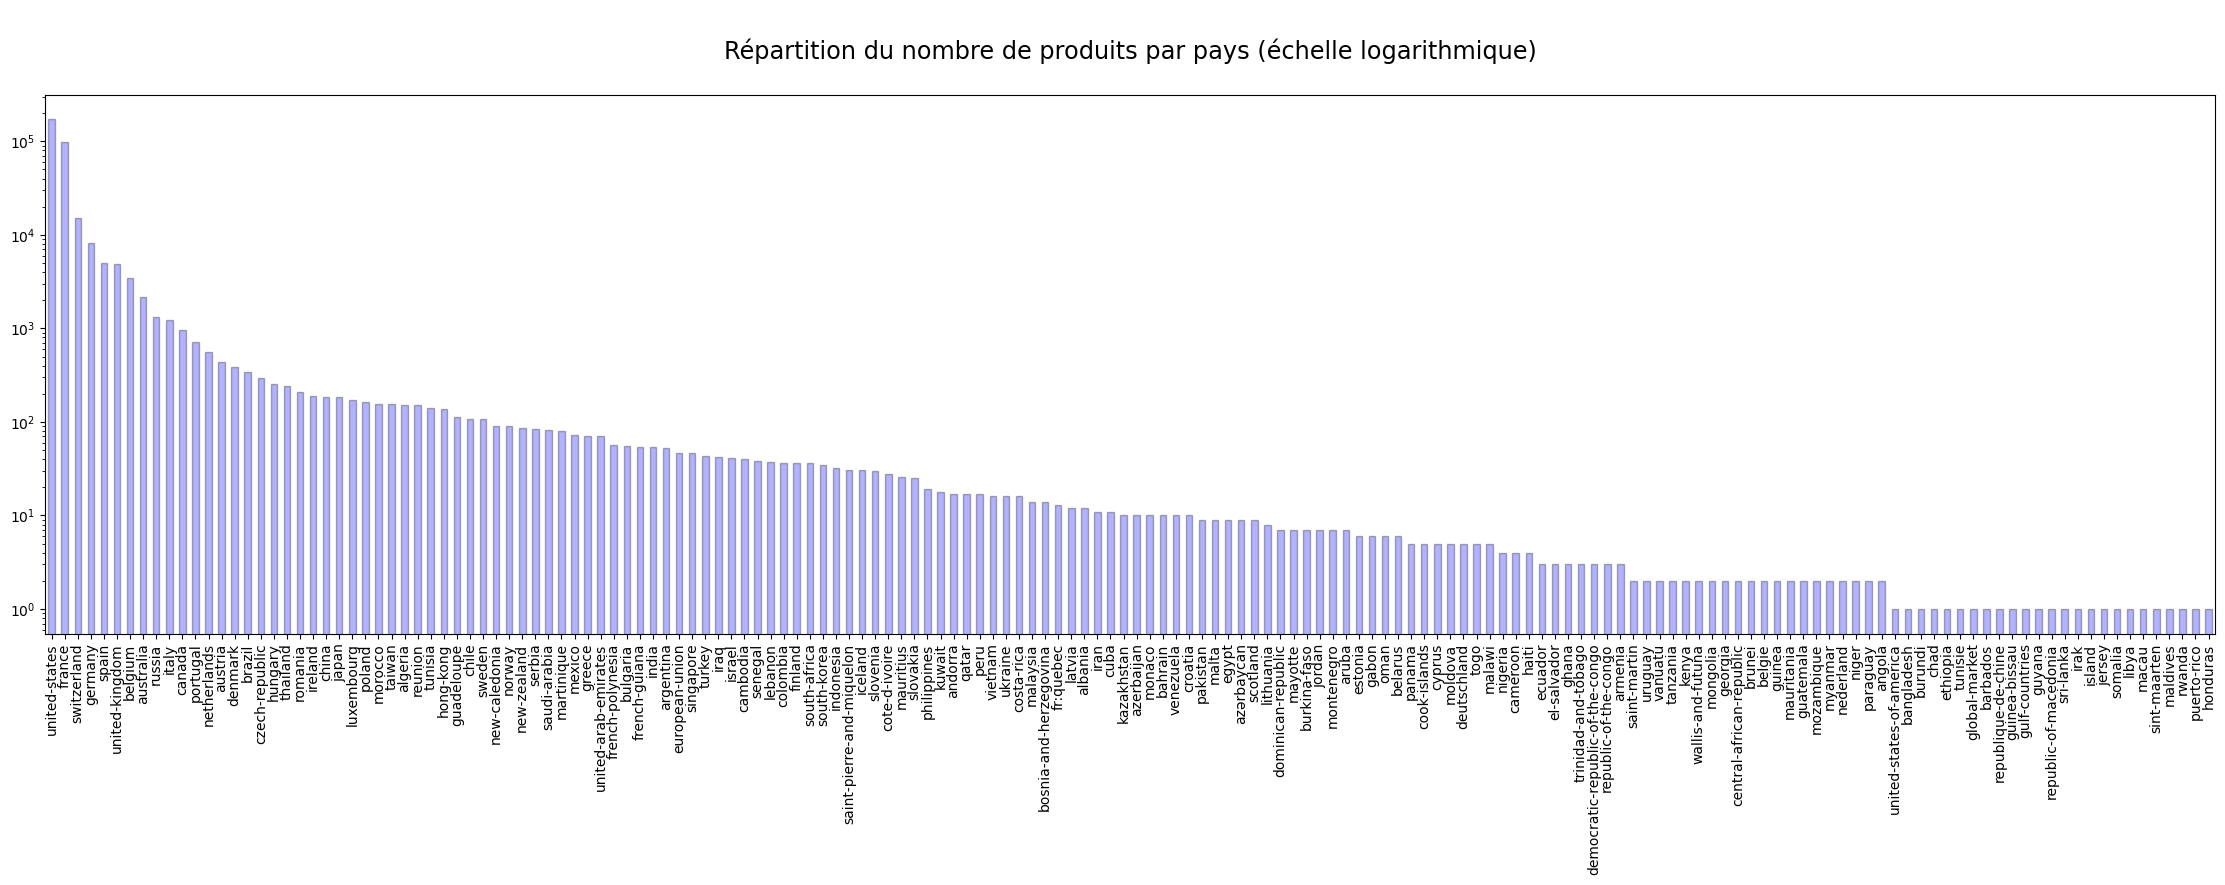

In [9]:
# Création d'une nouvelle colonne "pays", avec pour chaque ligne le contenu de "countries_tags" duquel j'ai enlevé les "en:"
data_clean = data_clean.assign(pays=data_clean['countries_tags'].str.replace(r'en:', '', regex=True))
print("Colonne pays créée")


print("Nombre de valeurs différentes de la colonne pays avant traitement :", len(data_clean['pays'].unique()))

# Pour les lignes de *countries_tags* qui contiennent plusieurs pays, je décide de ne garder que le premier.
data_clean['pays'] = data_clean['pays'].str.replace(',.*', '', regex=True)


# Dans ce dictionnaire sont stockées les valeurs invalides et les bonnes valeurs correspondantes
dico = {
        "سلطنة-عمان" : "oman",
        "السعودية" : "saudi-arabia",
        "other-日本" : "japan",
        "other-العراق" : "irak",
        "الإمارات-العربية-المتحدة" : "united-arab-emirates",
        "turkiye" : "turkey",
        "日本" : "japan",
        "other-japon" : "japan",
        "香港" : "hong-kong",
        "denemarken" : "denmark",
        "other-turquie" : "turkey",
        "quebec" : "canada",
        "भारत" : "india",
        "البحرين" : "bahrain",
        "world" : np.nan
        }

# On utilise le dictionnaire ci-dessus pour faire les corrections dans la colonne "pays"
data_clean.replace({"pays": dico},inplace=True)

print("Nombre de valeurs différentes de la colonne pays après traitement :", len(data_clean['pays'].unique()))

# Je prends le compte pour la colonne 'code' que je sais pleine à 100%
display(data_clean.groupby(['pays'])['code'].count().describe())


plt.figure(figsize=(28,7))
plt.title("\nRépartition du nombre de produits par pays (échelle logarithmique)\n", fontsize='xx-large')
plt.yscale("log")
data_clean.groupby(['pays'])['code'].count().sort_values(ascending=False).plot.bar(color = "blue", alpha = 0.3, edgecolor='black').set(xlabel=None)
plt.show()




## Traitement du type des colonnes

### Conversion de la colonne *created_datetime* au format date

In [10]:
data_clean['created_datetime'] = pd.to_datetime(data_clean['created_datetime'], errors='coerce')

### Conversion de la colonne *nutrition_grade_uk* au format object

In [11]:
data_clean['nutrition_grade_uk'] = data_clean['nutrition_grade_uk'].astype(object)

- Les autres types sont OK.

### Gestion des colonnes Macro Nutriments

- *salt_100g* & *sodium_100g*

In [12]:
print('Valeurs manquantes dans sel :', data_clean['salt_100g'].isna().sum())
print('Valeurs manquantes dans sodium :', data_clean['sodium_100g'].isna().sum())
print("Quand sel est vide et que sodium non :", len(data_clean.loc[data_clean['salt_100g'].isna() & data_clean['sodium_100g'].notna()]))
print("Quand sodium est vide et que sel non :", len(data_clean.loc[data_clean['salt_100g'].notna() & data_clean['sodium_100g'].isna()]))

Valeurs manquantes dans sel : 65239
Valeurs manquantes dans sodium : 65286
Quand sel est vide et que sodium non : 0
Quand sodium est vide et que sel non : 47


- On ne conserve du coup que salt_100g

In [13]:
data_clean = data_clean.drop(columns='sodium_100g')

- *carbohydrates_100g* &  *sugars_100g*

In [14]:
print('Valeurs manquantes dans sugars_100g :', data_clean['sugars_100g'].isna().sum())
print('Valeurs manquantes dans carbohydrates_100g :', data_clean['carbohydrates_100g'].isna().sum())
print("Quand sugars_100g est vide et que carbohydrates_100g non :", len(data_clean.loc[data_clean['sugars_100g'].isna() & data_clean['carbohydrates_100g'].notna()]))
print("Quand carbohydrates_100g est vide et que sugars_100g non :", len(data_clean.loc[data_clean['sugars_100g'].notna() & data_clean['carbohydrates_100g'].isna()]))

Valeurs manquantes dans sugars_100g : 75778
Valeurs manquantes dans carbohydrates_100g : 77161
Quand sugars_100g est vide et que carbohydrates_100g non : 16196
Quand carbohydrates_100g est vide et que sugars_100g non : 17579


- Pour les lignes où *carbohydrates_100g* (glucides) est vide alors que *sugars_100g* (sucres) ne l'est pas ne sont pas logiques car les sucres sont inclus dans les glucides.<br>
Donc pour ces lignes on peut donner la valeur de *sugars_100g* à *carbohydrates_100g*.
- Attention, l'inverse n'est pas vrai, un aliment peut contenir des glucides mais pas de sucres (les sucres sont inclus dans les glucides, pas l'inverse)

In [15]:
print('Valeurs manquantes dans carbohydrates_100g avant traitement :', data_clean['carbohydrates_100g'].isna().sum())
data_clean['carbohydrates_100g'].loc[data_clean['sugars_100g'].notna() & data_clean['carbohydrates_100g'].isna()] = data_clean['sugars_100g'].loc[data_clean['sugars_100g'].notna() & data_clean['carbohydrates_100g'].isna()]
print('Valeurs manquantes dans carbohydrates_100g avant traitement :', data_clean['carbohydrates_100g'].isna().sum())

Valeurs manquantes dans carbohydrates_100g avant traitement : 77161
Valeurs manquantes dans carbohydrates_100g avant traitement : 59582


C:\Users\Data Science\AppData\Local\Temp\ipykernel_33996\2916157539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['carbohydrates_100g'].loc[data_clean['sugars_100g'].notna() & data_clean['carbohydrates_100g'].isna()] = data_clean['sugars_100g'].loc[data_clean['sugars_100g'].notna() & data_clean['carbohydrates_100g'].isna()]


## Traitement des valeurs aberrantes

## Macro nutriments

On considère que tous les macro nutriments sont bien toujours exprimés en gramme, et que donc si une valeur dépasse 100 (pour 100g), elle est aberrante.<br>
Si dans de rares cas les valeurs seraient renseignées en milligramme, dans le doute on supprime.<br>
Pour les valeurs négatives, je les repasse en positif.

In [16]:
# Liste des colonnes représentant des macro nutriments :
macro_nutriments = [
                    'fat_100g',
                    'saturated-fat_100g',
                    'carbohydrates_100g',
                    'sugars_100g',
                    'fiber_100g',
                    'proteins_100g',
                    'salt_100g'
]


print("Macro nutriments avant traitement :")
display(data_clean[macro_nutriments].describe())
print("Valeurs nulles :")
display(data_clean[macro_nutriments].isnull().sum())

# Je mets toutes les valeurs en positif
data_clean[macro_nutriments] = data_clean[macro_nutriments].abs()

# Je supprime toutes les valeurs > 100, puisque c'est normalement des valeurs pour 100g
for i in macro_nutriments:
    data_clean[i].loc[data_clean[i] > 100] = np.nan


print("Macro nutriments après traitement :")
display(data_clean[macro_nutriments].describe())
print("Valeurs nulles :")
display(data_clean[macro_nutriments].isnull().sum())

Macro nutriments avant traitement :


,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,243891.000000,229554.000000,261167.000000,244971.000000,200886.000000,259906.000000,255510.000000
mean,12.730379,5.129932,30.931784,16.003484,2.862111,7.076366,2.028624
std,17.578747,8.014238,30.305559,22.327284,12.867578,8.409137,128.269454
min,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000
25%,0.000000,0.000000,5.000000,1.300000,0.000000,0.700000,0.063500
50%,5.000000,1.790000,19.000000,5.710000,1.500000,4.760000,0.581660
75%,20.000000,7.140000,57.140000,24.000000,3.600000,10.000000,1.374140
max,714.290000,550.000000,3520.000000,3520.000000,5380.000000,430.000000,64312.800000


Valeurs nulles :


fat_100g               76858
saturated-fat_100g     91195
carbohydrates_100g     59582
sugars_100g            75778
fiber_100g            119863
proteins_100g          60843
salt_100g              65239
dtype: int64

Macro nutriments après traitement :


C:\Users\Data Science\AppData\Local\Temp\ipykernel_33996\2927799605.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[i].loc[data_clean[i] > 100] = np.nan


,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,243887.000000,229551.000000,261147.000000,244959.000000,200882.000000,259903.000000,255352.000000
mean,12.725256,5.125925,30.900939,15.985141,2.832492,7.079823,1.588497
std,17.503695,7.913684,28.971066,21.165160,4.588268,8.156608,6.242531
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,1.300000,0.000000,0.700000,0.063500
50%,5.000000,1.790000,19.000000,5.710000,1.500000,4.760000,0.580000
75%,20.000000,7.140000,57.140000,24.000000,3.600000,10.000000,1.371600
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Valeurs nulles :


fat_100g               76862
saturated-fat_100g     91198
carbohydrates_100g     59602
sugars_100g            75790
fiber_100g            119867
proteins_100g          60846
salt_100g              65397
dtype: int64

## Micro nutriments

On considère que les micros nutriments sont exprimés en milligrammes, donc si une valeur dépasse 100k (pour 100g, soit 100k mg), elle est aberrante.<br>
Pour les valeurs négatives, je les repasse en positif.<br>
Pour les valeurs inférieures à 1 : elles devaient avoir été entrées en gramme, donc je multiplie par 1000.


In [17]:
# Je vais prendre toutes les colonnes finissant en '_100g'
# y retirer la liste de macro nutriments, les vitamines + quelque colonnes spécifiques
# Comme ça si dans un futur dataset certaines colonnes finissaient par
# passer le filtre des colonnes vides au début, elles seraient incluses
colonnes_100g = [x for x in data_clean.columns if  '_100g' in x]
vitamines = [x for x in data_clean.columns if  '_100g' and 'vitamin' in x]
a_retirer = macro_nutriments + vitamines + [
                                            'energy_100g',
                                            'nutrition-score-fr_100g',
                                            'nutrition-score-uk_100g',
                                            'water-hardness_100g'
                                            ]

micro_nutriments = [i for i in colonnes_100g if i not in a_retirer]


print("Micro nutriments avant traitement :")
display(data_clean[micro_nutriments].describe())
print("Valeurs nulles :")
display(data_clean[micro_nutriments].isnull().sum())


# Je mets toutes les valeurs en positif
data_clean[micro_nutriments] = data_clean[micro_nutriments].abs()

# Je supprime toutes les valeurs > 100000, puisque c'est normalement des valeurs en mg pour 100g
for i in micro_nutriments:
    data_clean[i].loc[data_clean[i] > 100000] = np.nan

# Je multiplie les valeurs < 1 (présumées exprimées en grammes) par 1000 pour les mettre en mg comme le reste
for i in micro_nutriments:
    data_clean[i].loc[data_clean[i] < 1] = data_clean[i].loc[data_clean[i] < 1] * 1000


print("Micro nutriments après traitement :")
display(data_clean[micro_nutriments].describe())
print("Valeurs nulles :")
display(data_clean[micro_nutriments].isnull().sum())


Micro nutriments avant traitement :


,trans-fat_100g,cholesterol_100g,calcium_100g,iron_100g
count,143298.000000,144090.000000,141050.000000,140462.000000
mean,0.073476,0.020071,0.125163,0.003652
std,1.540223,0.358062,3.318263,0.214408
min,-3.570000,0.000000,0.000000,-0.000260
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.035000,0.001010
75%,0.000000,0.020000,0.106000,0.002400
max,369.000000,95.238000,694.737000,50.000000


Valeurs nulles :


trans-fat_100g      177451
cholesterol_100g    176659
calcium_100g        179699
iron_100g           180287
dtype: int64

Micro nutriments après traitement :


C:\Users\Data Science\AppData\Local\Temp\ipykernel_33996\3972156700.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[i].loc[data_clean[i] > 100000] = np.nan
C:\Users\Data Science\AppData\Local\Temp\ipykernel_33996\3972156700.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[i].loc[data_clean[i] < 1] = data_clean[i].loc[data_clean[i] < 1] * 1000


,trans-fat_100g,cholesterol_100g,calcium_100g,iron_100g
count,143298.000000,144090.000000,141050.000000,140462.000000
mean,3.877080,18.280727,86.420525,1.878646
std,47.614805,37.873753,152.037585,5.141388
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,35.000000,1.010000
75%,0.000000,20.000000,103.000000,2.400000
max,993.000000,996.000000,993.000000,892.860000


Valeurs nulles :


trans-fat_100g      177451
cholesterol_100g    176659
calcium_100g        179699
iron_100g           180287
dtype: int64

## Vitamines

On considère que les vitamines sont exprimés en mg (c'est souvent le cas quand on parle de nourriture), donc rien d'aberrant si ça dépasse 100.<br>
Pour les valeurs négatives, je les repasse en positif.<br>
Pour les valeurs inférieures à 1 : elles devaient avoir été entrées en grammes. Donc je multiplie par 1000.

In [18]:
vitamines = [x for x in data_clean.columns if  '_100g' and 'vitamin' in x]

print("Vitamines avant traitement :")
display(data_clean[vitamines].describe())
print("Valeurs nulles :")
display(data_clean[vitamines].isnull().sum())

# Je mets toutes les valeurs en positif
data_clean[vitamines] = data_clean[vitamines].abs()

# Je multiplie les valeurs < 1 (présumées exprimées en grammes) par 1000 pour les mettre en mg comme le reste
for i in vitamines:
    data_clean[i].loc[data_clean[i] < 1] = data_clean[i].loc[data_clean[i] < 1] * 1000

print("Vitamines avant traitement :")
display(data_clean[vitamines].describe())
print("Valeurs nulles :")
display(data_clean[vitamines].isnull().sum())


Vitamines avant traitement :


,vitamin-a_100g,vitamin-c_100g
count,137554.000000,140867.000000
mean,0.000397,0.023367
std,0.073278,2.236451
min,-0.000340,-0.002100
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000107,0.003700
max,26.700000,716.981100


Valeurs nulles :


vitamin-a_100g    183195
vitamin-c_100g    179882
dtype: int64

Vitamines avant traitement :


C:\Users\Data Science\AppData\Local\Temp\ipykernel_33996\3330084392.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[i].loc[data_clean[i] < 1] = data_clean[i].loc[data_clean[i] < 1] * 1000


,vitamin-a_100g,vitamin-c_100g
count,137554.000000,140867.000000
mean,0.166312,7.478665
std,2.338444,31.509671
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.107100,3.600000
max,800.000000,990.200000


Valeurs nulles :


vitamin-a_100g    183195
vitamin-c_100g    179882
dtype: int64

## Colonnes *ingredients_from_palm_oil_n* et *ingredients_that_may_be_from_palm_oil_n*

In [19]:
palm_oil_n = [
        'ingredients_from_palm_oil_n',
        'ingredients_that_may_be_from_palm_oil_n'
]

display(data_clean[palm_oil_n].describe())


,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
count,248939.000000,248939.000000
mean,0.019659,0.055246
std,0.140524,0.269207
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,2.000000,6.000000


Il n'a a pas l'air d'avoir de souci ici

## Colonne *additives_n*

In [20]:
display(data_clean['additives_n'].describe())

count    248939.000000
mean          1.936024
std           2.502019
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          31.000000
Name: additives_n, dtype: float64

La valeur max a l'air anormalement élevée ! Faisons un histogramme.

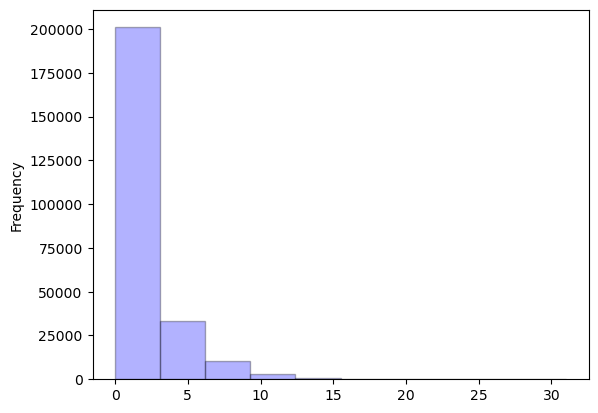

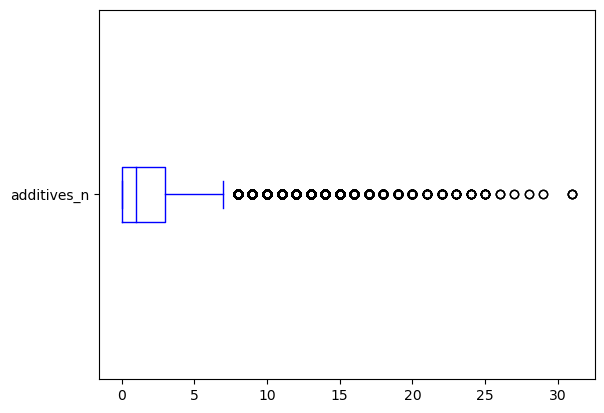

In [21]:
data_clean['additives_n'].plot.hist(color = "blue", alpha = 0.3, edgecolor='black');
plt.show()
data_clean['additives_n'].plot.box(color = "blue", vert=False);
plt.show()

Cependant, en regardant le nom des produits concernés, ça semble plausible. Donc des valeurs atypiques plus qu'aberrante : 

In [22]:
data_clean.loc[data_clean['additives_n'] > 25][['product_name','additives_n']]

,product_name,additives_n
13169,"Carvel, The Original Ice Cream Cake, Chocolate...",26.0
16566,"Ice Cream Cake, Vanilla & Chocolate Swirl",28.0
21432,Star Crunch Cookies,28.0
61104,"Jon Donaire, Red Velvet Ice Cream Cupcakes",26.0
78862,"Ice Cream Cake, Chocolate & Vanilla Swirl",27.0
91122,Caramel Pecan Danish Coffeecake,29.0
91130,Mackinaw Fudge Cake,29.0
156634,Italian Style Pinwheels,31.0
160788,"Sweet Espresso Caramel Cake, Sea Salt Caramel",27.0
184345,Confiserie,31.0


Est-il possible de combler des valeurs manquantes de la colonne additives_n avec less informations de additives_tags ?

In [23]:
print("Il y a", len(data_clean.loc[data_clean['additives_n'].isnull() & data_clean['additives_tags'].notnull()]), "ligne(s) où additives_n est vide alors que additives_tags est non vide.")

Il y a 0 ligne(s) où additives_n est vide alors que additives_tags est non vide.


Le cas de figure ne se présent pas.

En résumé : pas de traitement sur la colonne *additives_n*.

## Colonne *nutrition_grade_fr*

In [24]:
print("Toutes les valeurs de la colonne nutrition_grade_fr :", data_clean['nutrition_grade_fr'].unique())


Toutes les valeurs de la colonne nutrition_grade_fr : [nan 'd' 'b' 'c' 'a' 'e']


Rien d'aberrant ici, pas de traitement.

## Colonnes *pnns_groups_1* & *pnns_groups_2*


In [25]:
display(data_clean.loc[data_clean['pnns_groups_1'].notnull()][['pnns_groups_1', 'pnns_groups_2']].describe())
print("groups_1 NaN + unknown :", len(data_clean.loc[(data_clean['pnns_groups_1'] == "unknown") | (data_clean['pnns_groups_1'].isnull())]))
print("groups_1 NaN :", len(data_clean.loc[data_clean['pnns_groups_1'].isnull()]))
print("groups_1 unknown :", len(data_clean.loc[data_clean['pnns_groups_1'] == "unknown"]))
print("----------")
print("groups_2 NaN + unknown :", len(data_clean.loc[(data_clean['pnns_groups_2'] == "unknown") | (data_clean['pnns_groups_2'].isnull())]))
print("groups_2 NaN :", len(data_clean.loc[data_clean['pnns_groups_2'].isnull()]))
print("groups_2 unknown :", len(data_clean.loc[data_clean['pnns_groups_2'] == "unknown"]))

,pnns_groups_1,pnns_groups_2
count,91513,91513
unique,14,40
top,unknown,unknown
freq,22624,22624


groups_1 NaN + unknown : 251860
groups_1 NaN : 229236
groups_1 unknown : 22624
----------
groups_2 NaN + unknown : 248882
groups_2 NaN : 226258
groups_2 unknown : 22624


- Il y a beaucoup de "unknown" dans *pnns_groups_1* et *pnns_groups_2*. Si le type d'aliment était bien identifié mais pas présent dans les différents groupes, on aurait quelque chose du type "other".<br>
Ici "unknown" signifie, inconnu, non renseigné. Donc je vais les remplacer par des NaN.
- Par ailleurs, certaines valeurs de *pnns_groups_2* sont des doublons sans majuscule : j'uniformise.
- Enfin, certaines valeurs de *pnns_groups_1* sont des doublons sans majuscule et d'autres avec des tirets : j'uniformise.

In [26]:
print("Avant traitement :")
display(data_clean['pnns_groups_1'].describe())
print("Valeurs nulles :", data_clean['pnns_groups_1'].isnull().sum())
print("---------")
display(data_clean['pnns_groups_2'].describe())
print("Valeurs nulles :", data_clean['pnns_groups_2'].isnull().sum())

# Je supprime toutes les valeurs "unknown"
for i in ['pnns_groups_1', 'pnns_groups_2']:
    data_clean[i].loc[data_clean[i] == "unknown"] = np.nan

# Capitalisation de la première lettre de toutes les catégories.
data_clean['pnns_groups_2'] = data_clean['pnns_groups_2'].str.capitalize()

# Remplacement des "-" par des esapces
data_clean['pnns_groups_1'] = data_clean['pnns_groups_1'].str.replace('-', ' ')
# Capitalisation de la première lettre de toutes les catégories.
data_clean['pnns_groups_1'] = data_clean['pnns_groups_1'].str.capitalize()


print("Après traitement :")
display(data_clean['pnns_groups_1'].describe())
print("Valeurs nulles :", data_clean['pnns_groups_1'].isnull().sum())
print("---------")
display(data_clean['pnns_groups_2'].describe())
print("Valeurs nulles :", data_clean['pnns_groups_2'].isnull().sum())

Avant traitement :


count       91513
unique         14
top       unknown
freq        22624
Name: pnns_groups_1, dtype: object

Valeurs nulles : 229236
---------


count       94491
unique         42
top       unknown
freq        22624
Name: pnns_groups_2, dtype: object

Valeurs nulles : 226258
Après traitement :


C:\Users\Data Science\AppData\Local\Temp\ipykernel_33996\1177232836.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[i].loc[data_clean[i] == "unknown"] = np.nan


count             68889
unique                9
top       Sugary snacks
freq              12864
Name: pnns_groups_1, dtype: object

Valeurs nulles : 251860
---------


count              71867
unique                36
top       One-dish meals
freq                5546
Name: pnns_groups_2, dtype: object

Valeurs nulles : 248882


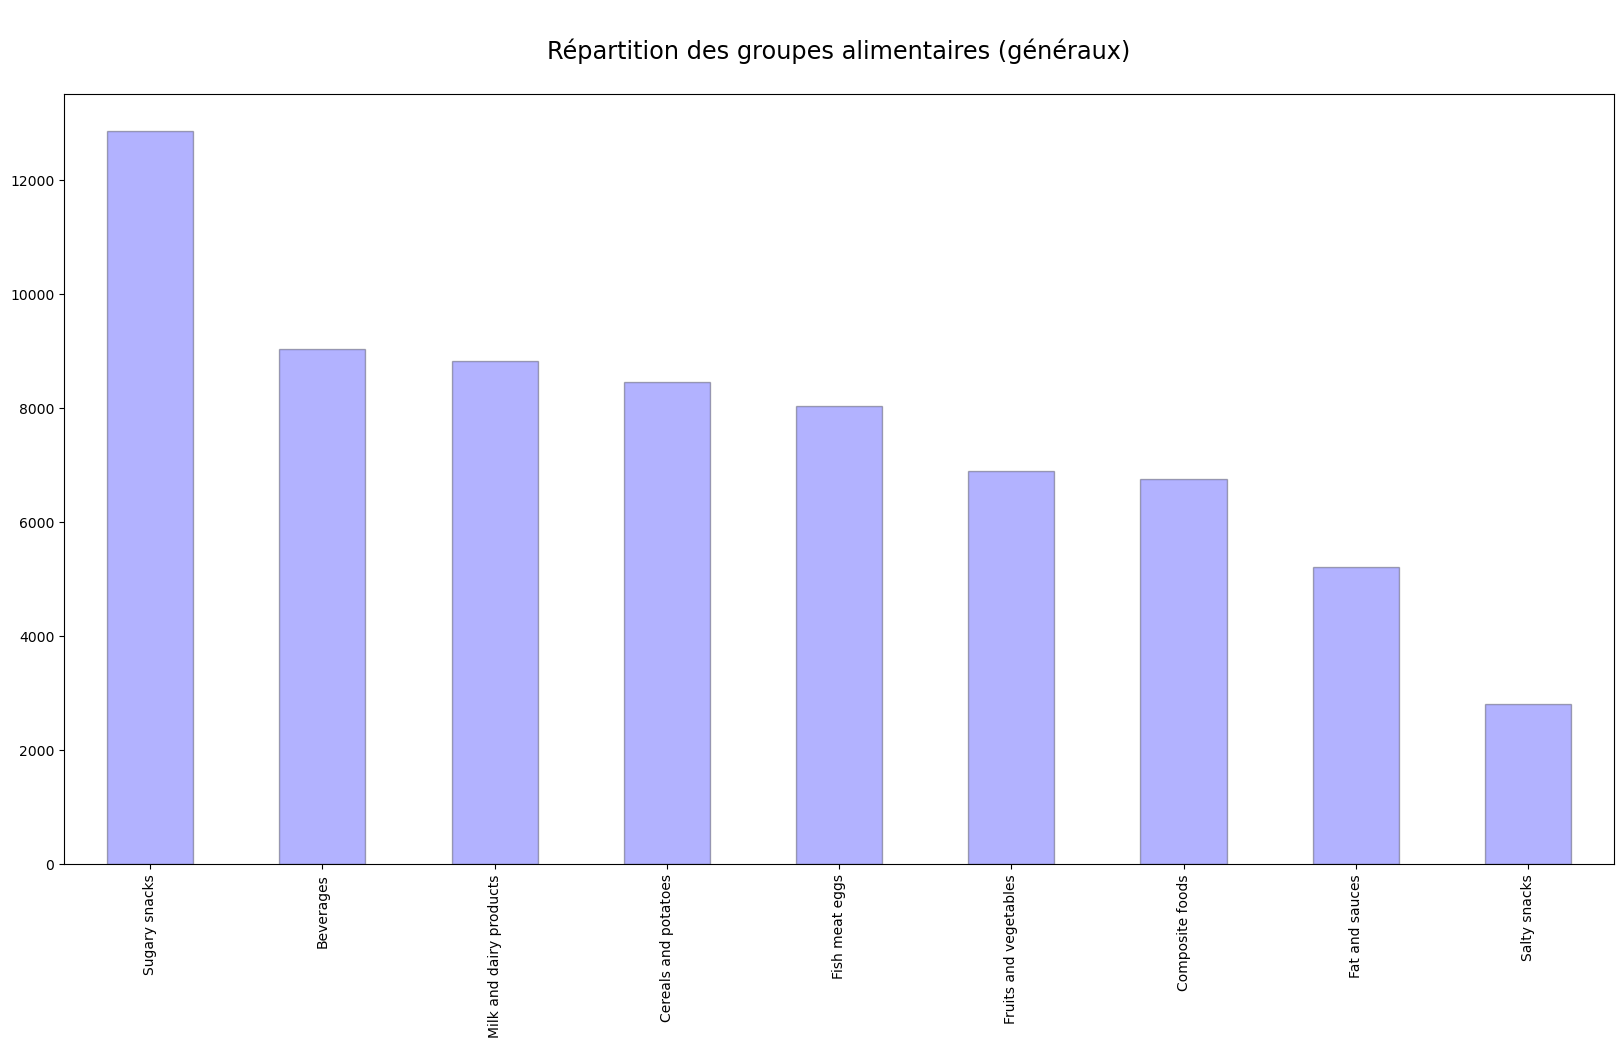

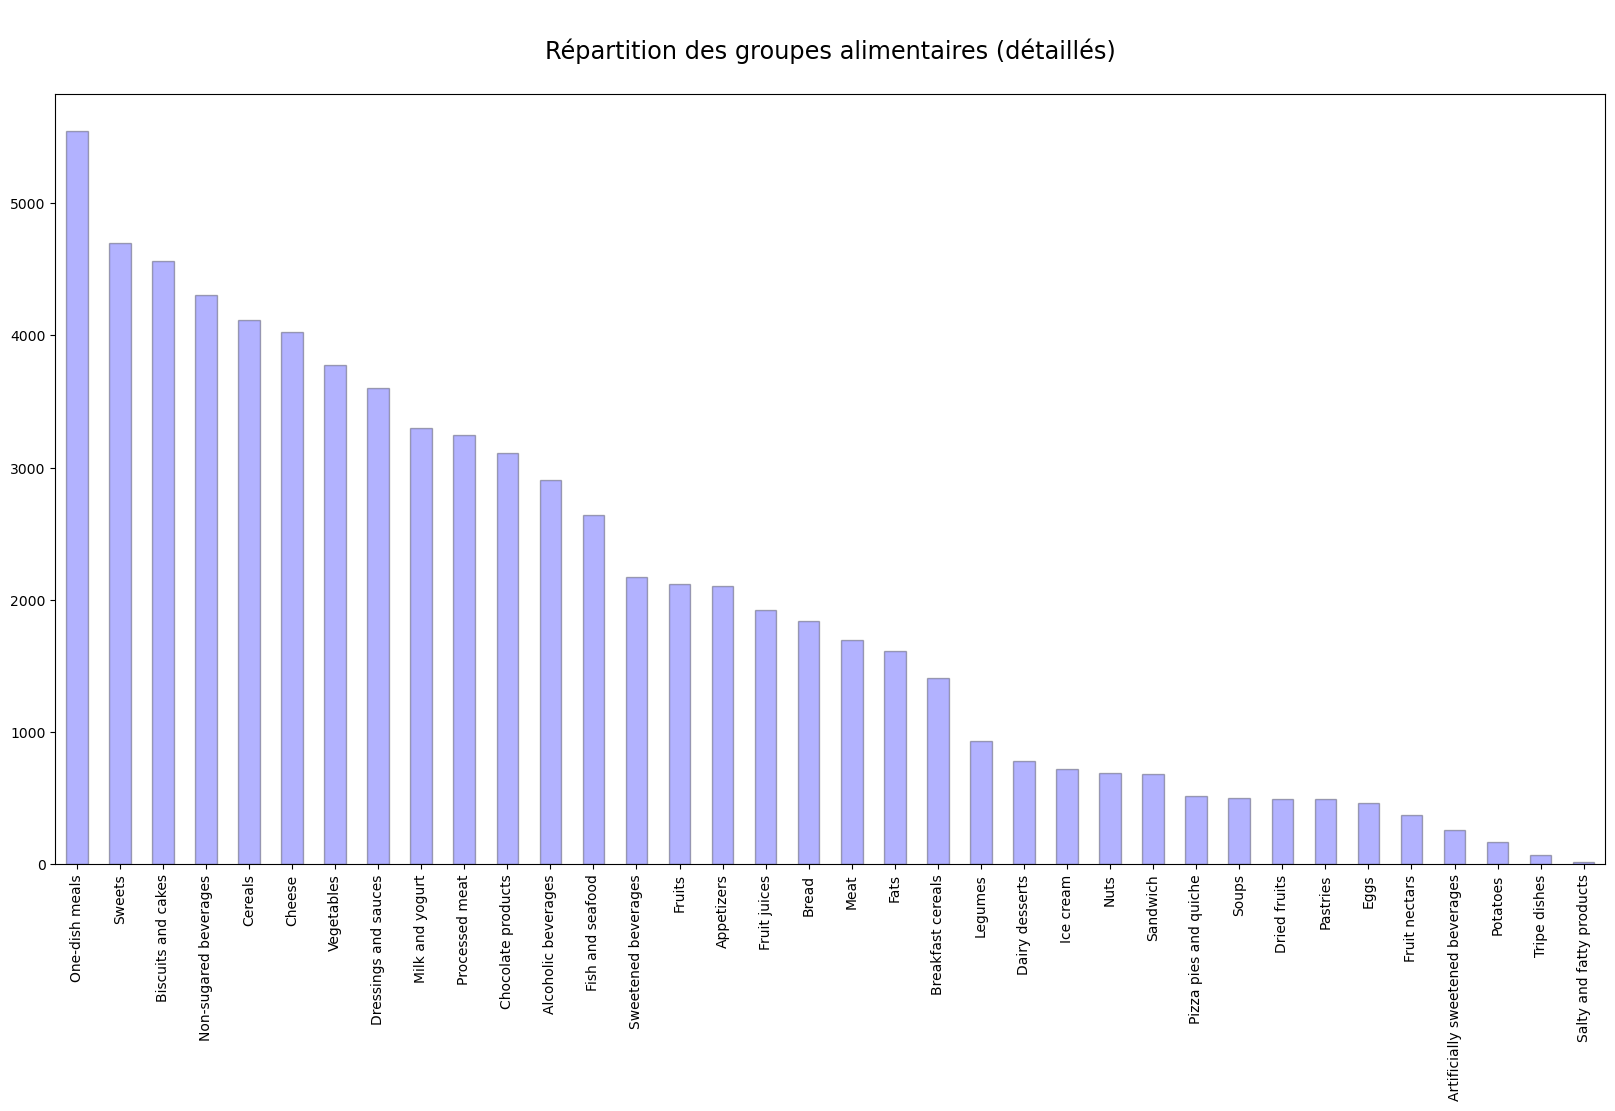

In [27]:
plt.figure(figsize=(20,10))
plt.title("\nRépartition des groupes alimentaires (généraux)\n", fontsize='xx-large')
data_clean.groupby(['pnns_groups_1'])['code'].count().sort_values(ascending=False).plot.bar(color = "blue", alpha = 0.3, edgecolor='black').set(xlabel=None)
plt.show()
plt.figure(figsize=(20,10))
plt.title("\nRépartition des groupes alimentaires (détaillés)\n", fontsize='xx-large')
data_clean.groupby(['pnns_groups_2'])['code'].count().sort_values(ascending=False).plot.bar(color = "blue", alpha = 0.3, edgecolor='black').set(xlabel=None)
plt.show()

## Colonnes *nutrition-score-fr_100g* & *nutrition-score-uk_100g*

In [28]:
display(data_clean['nutrition-score-fr_100g'].describe())
display(data_clean['nutrition-score-uk_100g'].describe())

count    221210.000000
mean          9.165535
std           9.055903
min         -15.000000
25%           1.000000
50%          10.000000
75%          16.000000
max          40.000000
Name: nutrition-score-fr_100g, dtype: float64

count    221210.000000
mean          9.058049
std           9.183589
min         -15.000000
25%           1.000000
50%           9.000000
75%          16.000000
max          40.000000
Name: nutrition-score-uk_100g, dtype: float64

**Les valeurs vont bien de -15 à 40, qui sont les bornes du nutriscore.**

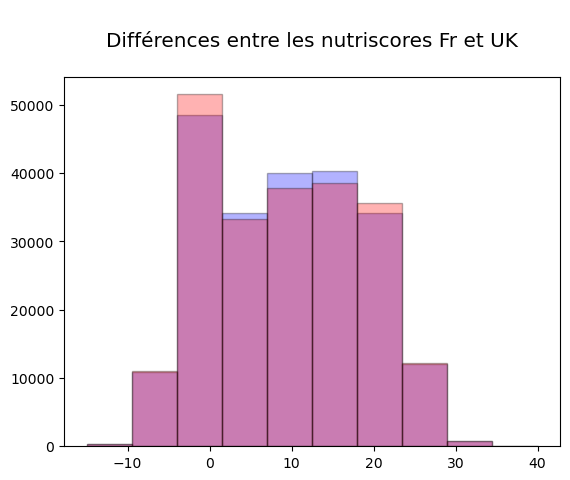

In [29]:
plt.title("\nDifférences entre les nutriscores Fr et UK\n", fontsize='x-large')
data_clean['nutrition-score-fr_100g'].plot.hist(color = "blue", alpha = 0.3, edgecolor='black').set(ylabel=None)
data_clean['nutrition-score-uk_100g'].plot.hist(color = "red", alpha = 0.3, edgecolor='black').set(ylabel=None)
plt.show()

**On observe de légères différences entre les nutriscores Fr et UK.**<br>
**Ces différences ne sont pas étonnantes car le mode de calcul aux UK est légèrement différent. (Cf : [la documentation des variables](https://world.openfoodfacts.org/data/data-fields.txt))**

**Les données de ces deux colonnes semblent bonnes, pas de traitement à faire**

## Colonne *energy_100g*

count    2.611130e+05
mean     1.141915e+03
std      6.447154e+03
min      0.000000e+00
25%      3.770000e+02
50%      1.100000e+03
75%      1.674000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64

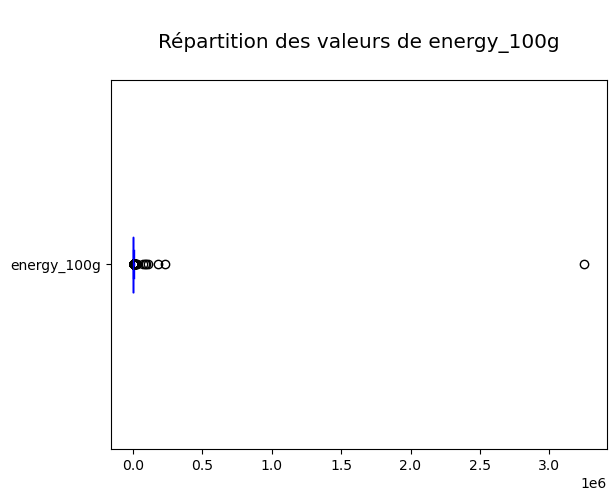

In [30]:
display(data_clean['energy_100g'].describe())

plt.title("\nRépartition des valeurs de energy_100g\n", fontsize='x-large')
data_clean['energy_100g'].plot.box(color = "blue", vert=False);
plt.show()

Il y a dans cette colonne des valeurs très élevées.<br>
Considérons que les valeurs sont en kJ (l'unité qui donne des valeurs les plus élevées)<br>
Considérons maintenant l'aliment le plus énergétique : les lipides purs, à 37 kJ/g, soit 3700 kJ pour 100g (Cf [Wikipédia](https://fr.wikipedia.org/wiki/Valeur_%C3%A9nerg%C3%A9tique))<br>
On peut alors déduire que toutes les valeurs supérieures à 3700 sont aberrantes.

count    2.611130e+05
mean     1.141915e+03
std      6.447154e+03
min      0.000000e+00
25%      3.770000e+02
50%      1.100000e+03
75%      1.674000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64

Valeurs nulles avant traitement : 59636


C:\Users\Data Science\AppData\Local\Temp\ipykernel_33996\1988799974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['energy_100g'].loc[data_clean['energy_100g'] > 3700] = np.nan


count    260480.000000
mean       1118.748058
std         788.270035
min           0.000000
25%         373.000000
50%        1098.500000
75%        1674.000000
max        3700.000000
Name: energy_100g, dtype: float64

Valeurs nulles après traitement : 60269


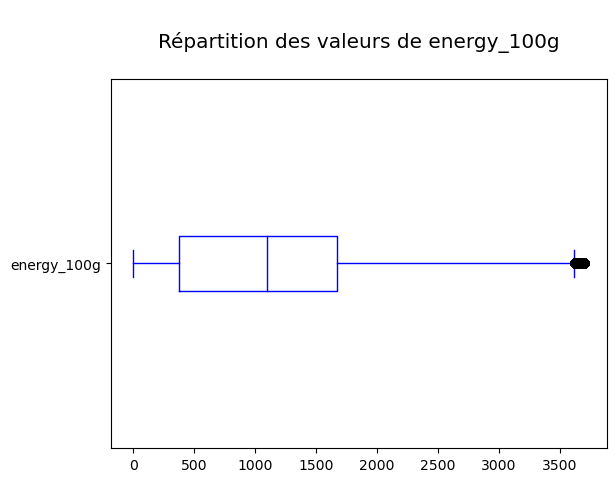

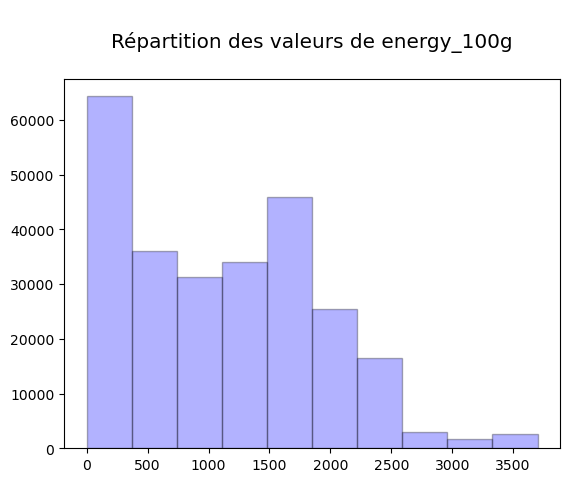

In [31]:
display(data_clean['energy_100g'].describe())
print("Valeurs nulles avant traitement :", data_clean['energy_100g'].isnull().sum())

# Je supprime toutes les valeurs > 3700, puisque c'est le maximum qu'un aliment peut apporter
data_clean['energy_100g'].loc[data_clean['energy_100g'] > 3700] = np.nan

display(data_clean['energy_100g'].describe())
print("Valeurs nulles après traitement :", data_clean['energy_100g'].isnull().sum())

plt.title("\nRépartition des valeurs de energy_100g\n", fontsize='x-large')
data_clean['energy_100g'].plot.box(color = "blue", vert=False);
plt.show()

plt.title("\nRépartition des valeurs de energy_100g\n", fontsize='x-large')
data_clean['energy_100g'].plot.hist(color = "blue", alpha = 0.3, edgecolor='black').set(ylabel=None);
plt.show()

Comment interpréter ce 2ème pic vers 1500 ? On dirait qu'il apparait à une valeur environ 4x supérieure au premier.<br>
Serait-ce un problème dû au fait qu'une partie des données a été entrée en kCal et non en kJ ? (les deux ont un rapport d'environ 4).<br>
Testons pour chaque catégorie, si le schéma se répète, il y a peut-être un souci : 

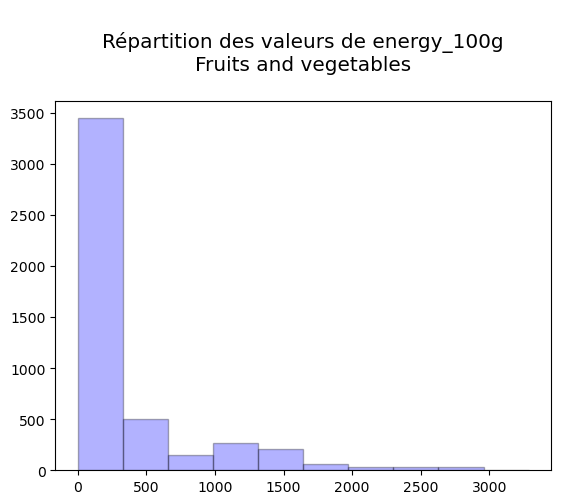

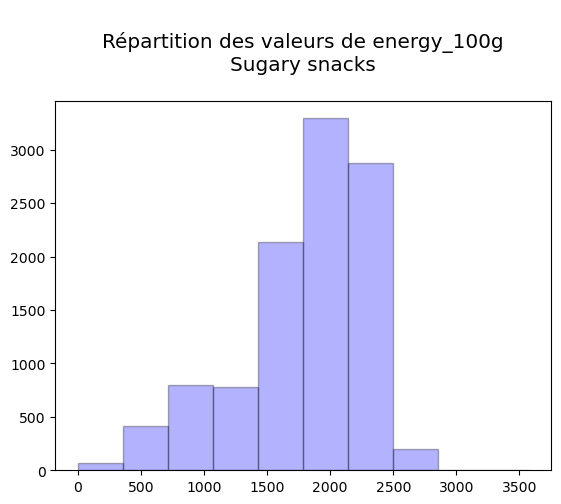

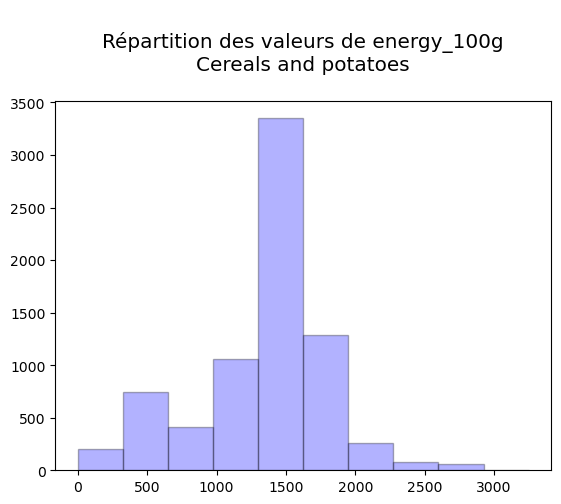

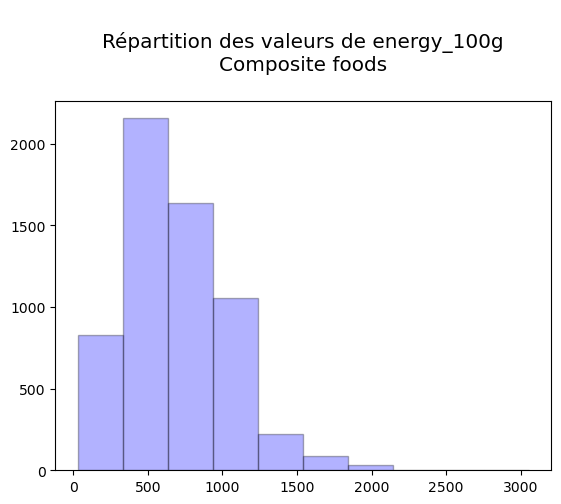

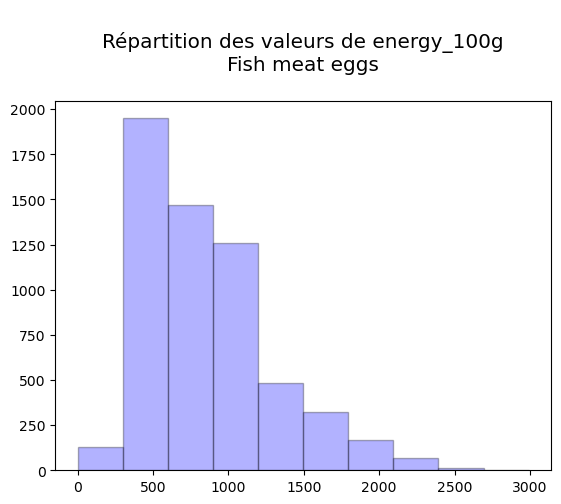

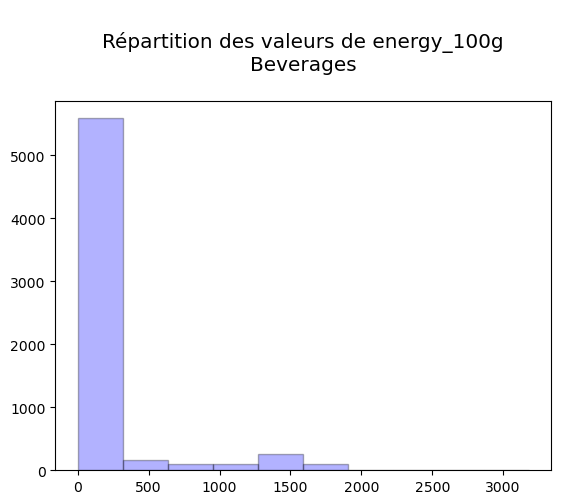

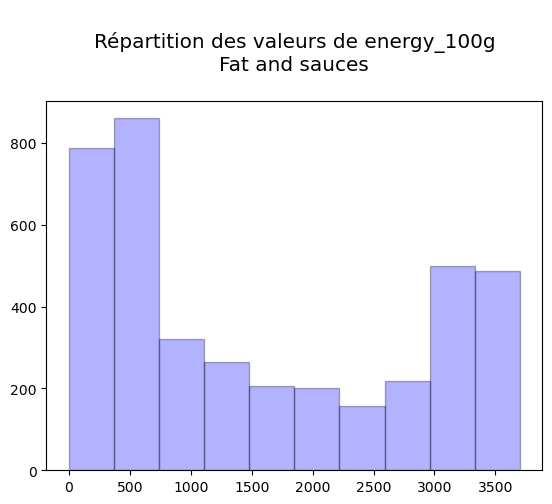

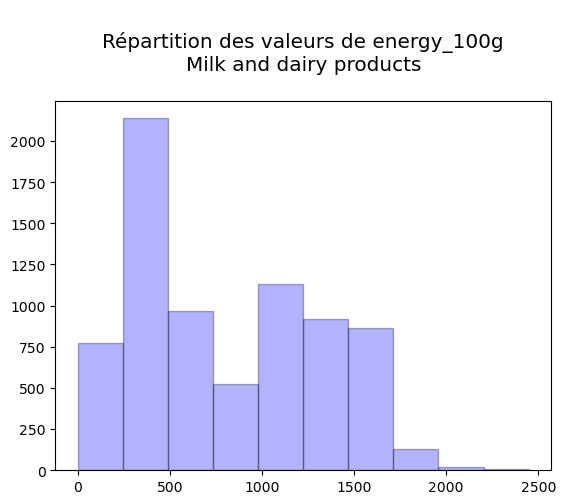

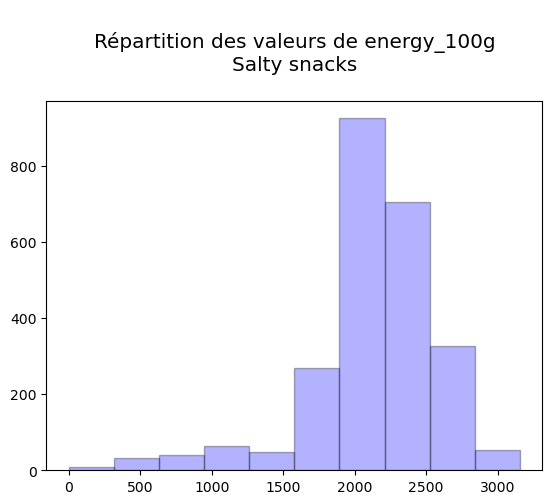

In [32]:
list_nrj = data_clean['pnns_groups_1'].unique().tolist()
list_nrj.pop(0) # Je retire le nan de la liste.
for i in list_nrj:
    plt.title(f"\nRépartition des valeurs de energy_100g\n{i}\n", fontsize='x-large')
    data_clean['energy_100g'].loc[data_clean['pnns_groups_1'] == i].plot.hist(color = "blue", alpha = 0.3, edgecolor='black').set(ylabel=None);
    plt.show()

Ok, il n'y a pas l'air d'avoir de problème majeur.

## Colonnes *allergens* & *traces*

Je les avais exclues du filtre des colonnes vides ou presque du début.<br>
En effet, les aliments contenant des allergènes ne sont pas si fréquents, il n'est pas étonnant d'avoir peu de données.

In [33]:
print("La colonne 'allergens' n'est remplie qu'à", round((1-data_clean['allergens'].isnull().sum()/len(data_clean))*100, 1), "%.")
print("La colonne 'traces' n'est remplie qu'à", round((1-data_clean['traces'].isnull().sum()/len(data_clean))*100, 1), "%.")

La colonne 'allergens' n'est remplie qu'à 8.8 %.
La colonne 'traces' n'est remplie qu'à 7.6 %.


Le contenu de ces deux colonnes est très hétérogènes (grand nombre de mots clefs, langues et structures différentes).<br>
Il sera donc compliqué dans un premier temps d'exploiter ces données.<br>
L'information que l'on peut en tirer pour le moment est : présence ou non d'allergènes/traces, tous types confondus.

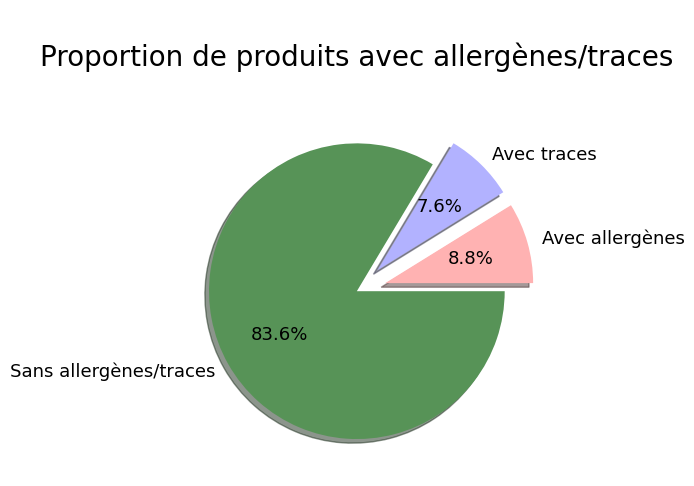

In [34]:
nb_allergens = len(data_clean.loc[data_clean['allergens'].notnull()])
nb_traces = len(data_clean.loc[data_clean['traces'].notnull()])
total_sans_all_tra = len(data_clean) - nb_allergens - nb_traces

labels = 'Avec allergènes', 'Avec traces', 'Sans allergènes/traces'
sizes = [nb_allergens, nb_traces, total_sans_all_tra]

colors=['#FFB2B2', '#B2B2FF', '#579357']
explode = (0.2, 0.2, 0)  # j'explose seulement les allergènes et traces

fig, ax = plt.subplots()
plt.title("\nProportion de produits avec allergènes/traces\n", fontsize=20)
ax.pie(sizes, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', colors=colors, textprops={'color':"black", 'fontsize':13});
plt.show()

## Imputations des colonnes

### Matrice de corrélation
Avant de débuter les imputations, observons les variables qui présentent une forte corrélation linéaire.

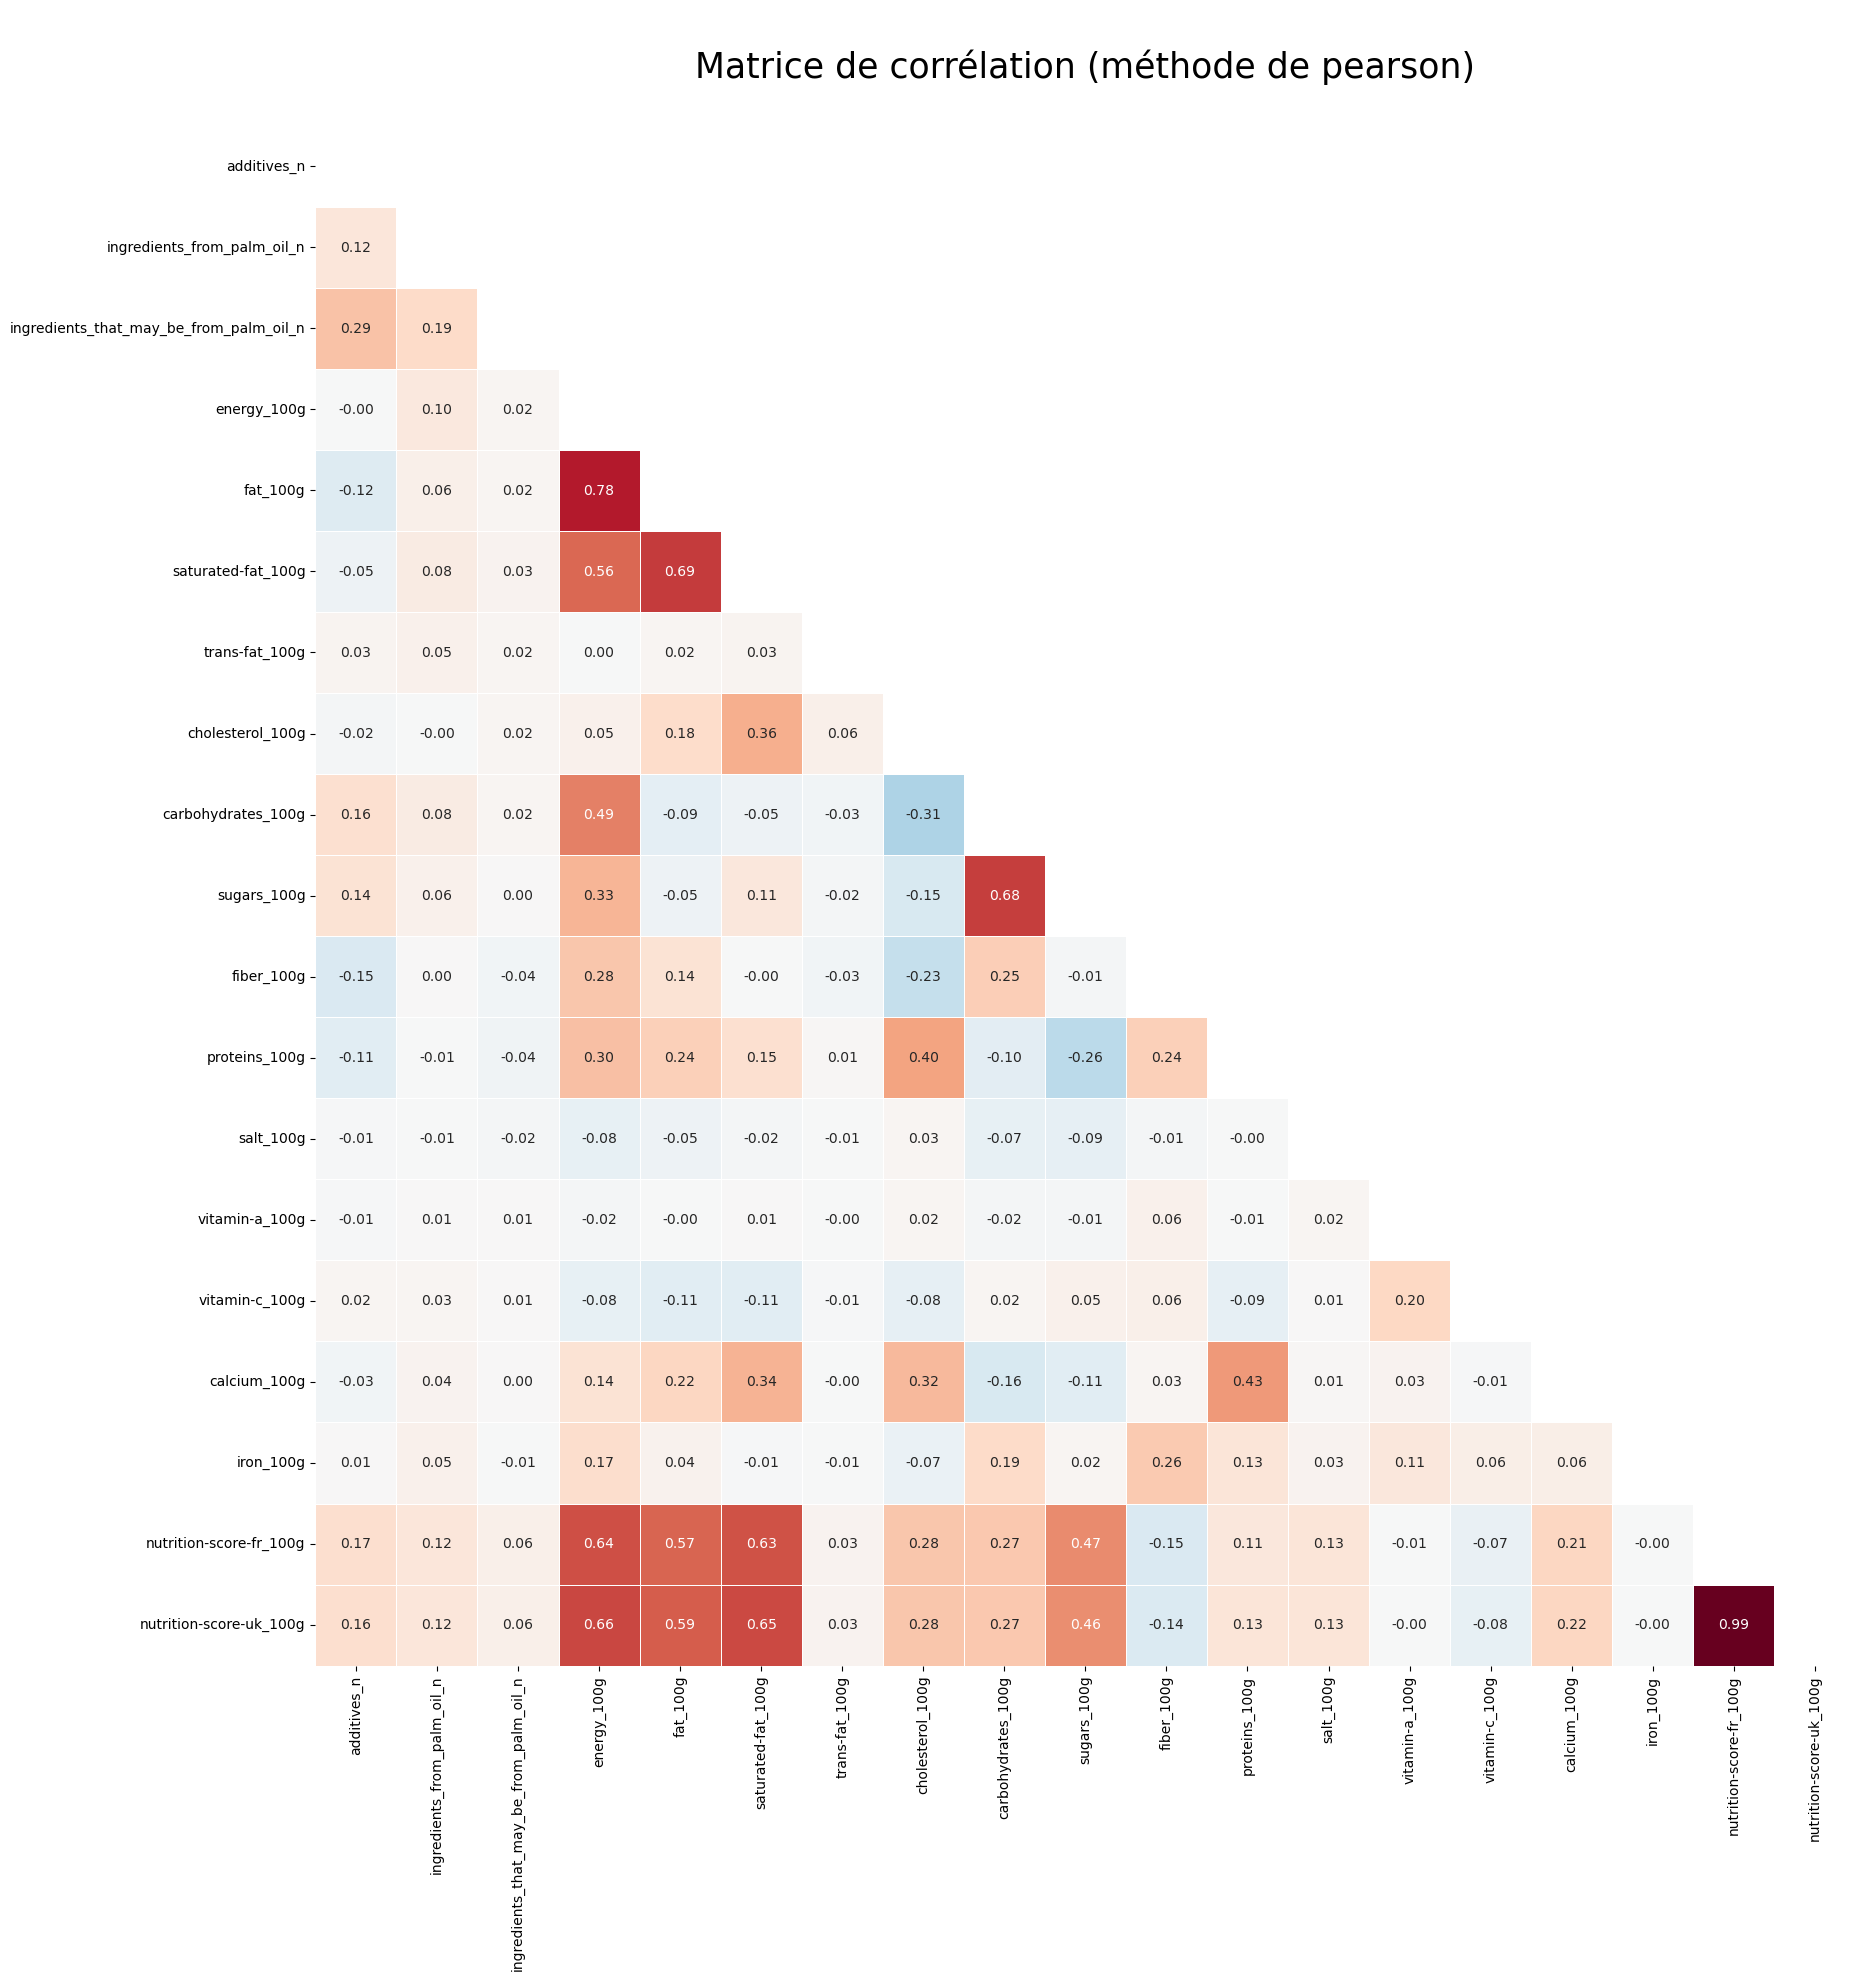

In [35]:
# Je repère les colonnes complètement vides.
colonnes_vides = data_clean.columns[data_clean.nunique() == 0]
# Je les enlèves des colonnes à analyser pour la corrélation
colonnes_pour_corr = [x for x in data_clean.columns if x not in colonnes_vides]

correlation = data_clean[colonnes_pour_corr].corr(numeric_only = True, method="pearson")
mask = np.triu(np.ones_like(correlation, dtype=bool), 0)

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation, mask=mask, cbar = False, center=0, cmap='RdBu_r', annot=True, annot_kws={"size": 10}, fmt='.2f', square=True, linewidths=0.5).set_title('\nMatrice de corrélation (méthode de pearson)\n', fontsize=25)
plt.show()

## Imputation des colonnes *nutrition-score-fr_100g* & *nutrition-score-uk_100g* : première approche

Bien qu'il y ait de légères différences entre les deux variablesn dû au mode de calcul du nutriscore UK légèrement différent, nous avons vu précédemment que leurs valeurs et distribution sont très similaires.<br>
On voit d'ailleurs dans la matrice de corrélation que les deux variables sont très corrélées.<br>
Commençons par regarder si pour les lignes où la valeur est manquante pour l'une des deux variables, la valeur est présente dans l'autre, permettant de reporter cette valeur pour la variable où elle est manquante : <br>

In [36]:
print("Valeurs manquantes dans 'nutrition-score-fr_100g' :", data_clean['nutrition-score-fr_100g'].isnull().sum())
print("Valeurs manquantes dans 'nutrition-score-uk_100g' :", data_clean['nutrition-score-uk_100g'].isnull().sum())
print("Valeurs présentes dans 'nutrition-score-uk_100g' lorsqu'elle est absente de nutrition-score-fr_100g :", len(data_clean.loc[(data_clean['nutrition-score-fr_100g'].isnull() == True) & (data_clean['nutrition-score-uk_100g'].isnull() == False)]))
print("Valeurs présentes dans 'nutrition-score-fr_100g' lorsqu'elle est absente de nutrition-score-uk_100g :", len(data_clean.loc[(data_clean['nutrition-score-fr_100g'].isnull() == False) & (data_clean['nutrition-score-uk_100g'].isnull() == True)]))

Valeurs manquantes dans 'nutrition-score-fr_100g' : 99539
Valeurs manquantes dans 'nutrition-score-uk_100g' : 99539
Valeurs présentes dans 'nutrition-score-uk_100g' lorsqu'elle est absente de nutrition-score-fr_100g : 0
Valeurs présentes dans 'nutrition-score-fr_100g' lorsqu'elle est absente de nutrition-score-uk_100g : 0


Le cas de figure ne se présente pas, lorsque la valeur est manquante pour une des deux variables, elle l'est toujours pour l'autre.

## Imputation des colonnes *nutrition-score-fr_100g* & *nutrition-score-uk_100g* : deuxième approche

Est-il possible de calculer avec les valeurs dont nous disposons ?<br>
(Modalités de calcul ici [documentation officielle sur Santé Publique France](https://www.santepubliquefrance.fr/media/files/02-determinants-de-sante/nutrition-et-activite-physique/nutri-score/qr-scientifique-technique))<br>
Pour faire ceci, nous avons besoin des variables suivantes (au moins l'une d'elle) : *energy_100g*, *sugars_100g*, *saturated-fat_100g*, *salt_100g* (éléments "négatifs") et *fruits-vegetables-nuts_100g*, *fiber_100g*, *proteins_100g* (éléments "positif")<br>
Il nous faut également obligatoirement le groupe alimentaire (contenu dans *pnns_groups_1*), car le calcul change en fonction de ce dernier.<br>
Premier problème, nous ne disposons pas de *fruits-vegetables-nuts_100g*, colonne qui a été éliminée car quasiment vide.<br>
Outre ce premier problème, essayons de voir si nous avons beaucoup de lignes contenant au moins une variable nécessaire quand le nutriscore est vide : 



In [37]:
print("Valeurs manquantes dans 'nutrition-score-fr_100g' :", data_clean['nutrition-score-fr_100g'].isnull().sum())

condition_fr = (data_clean['nutrition-score-fr_100g'].isnull() == True) & (data_clean['pnns_groups_1'].notnull() == True) & (
(data_clean['energy_100g'].notnull() == True)
|
(data_clean['salt_100g'].notnull() == True)
|
(data_clean['saturated-fat_100g'].notnull() == True)
|
(data_clean['sugars_100g'].notnull() == True)
|
(data_clean['fiber_100g'].notnull() == True)
|
(data_clean['proteins_100g'].notnull() == True)
)

print("Lignes avec nutrition-score-fr_100g vide, pnns_groups_1 renseigné et au moins une variable de calcul :", len(data_clean.loc[condition_fr]))

print("--------------")

print("Valeurs manquantes dans 'nutrition-score-uk_100g' :", data_clean['nutrition-score-uk_100g'].isnull().sum())

condition_uk = (data_clean['nutrition-score-uk_100g'].isnull() == True) & (data_clean['pnns_groups_1'].notnull() == True) & (
(data_clean['energy_100g'].notnull() == True)
|
(data_clean['salt_100g'].notnull() == True)
|
(data_clean['saturated-fat_100g'].notnull() == True)
|
(data_clean['sugars_100g'].notnull() == True)
|
(data_clean['fiber_100g'].notnull() == True)
|
(data_clean['proteins_100g'].notnull() == True)
)

print("Lignes avec nutrition-score-uk_100g vide, pnns_groups_1 renseigné et au moins une variable de calcul :", len(data_clean.loc[condition_uk]))



Valeurs manquantes dans 'nutrition-score-fr_100g' : 99539
Lignes avec nutrition-score-fr_100g vide, pnns_groups_1 renseigné et au moins une variable de calcul : 4852
--------------
Valeurs manquantes dans 'nutrition-score-uk_100g' : 99539
Lignes avec nutrition-score-uk_100g vide, pnns_groups_1 renseigné et au moins une variable de calcul : 4852


Moins de 5% des cas où on pourrait envisager d'essayer de calculer les valeurs manquantes pour les nutriscores : cette deuxième approche n'est pas non plus satisfaisante.<br>
Piste pour l'approche suivante : nous voyons que les nutriscores sont assez corrélés linéairement aux variables *energy_100g*, *fat_100g*, *saturated-fat_100g* et *sugars_100g*.<br>
Nous pourrons donc utiliser *IterativeImputer* de *Scikit-learn* pour imputer les nutriscores. Mais avant de procéder à ceci, nous devons déjà imputer les variables ci-dessus.

## Imputation des colonnes Macronutriments

Soit les macronutriments suivants : *fat_100g*, *saturated-fat_100g*, *carbohydrates_100g*, *sugars_100g*, *fiber_100g*, *proteins_100g*, *salt_100g*.<br>
Regardons d'abbord les lignes pour lesquelles aucunes de ces variables n'est renseignées : 

In [38]:
# Quand il n'y a aucun des macronutriments suivants : fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, fiber_100g, proteins_100g, salt_100g
condition_no_macro = (data_clean['fat_100g'].isnull() == True) & (data_clean['saturated-fat_100g'].isnull() == True) & (data_clean['carbohydrates_100g'].isnull() == True) & (data_clean['sugars_100g'].isnull() == True) & (data_clean['fiber_100g'].isnull() == True) & (data_clean['proteins_100g'].isnull() == True) & (data_clean['salt_100g'].isnull() == True)

display(data_clean.loc[condition_no_macro][['product_name']])


,product_name
0,Farine de blé noir
46,Filet de bœuf
47,Marks % Spencer 2 Blueberry Muffins
48,NaN
136,Twix x2
...,...
320765,Rillette d'oie
320766,NaN
320767,Tomato & ricotta
320769,乐吧泡菜味薯片


Il y en a un grand nombre. S'agit-il de boissons non sucrées de type eau, café, thé, etc ?<br>
Filtrons en enlevant *Non-sugared beverages* de la colonne *pnns_groups_2* : 

In [39]:
data_clean.loc[condition_no_macro][['product_name']].loc[data_clean['pnns_groups_2'] != "Non-sugared beverages"]

,product_name
0,Farine de blé noir
46,Filet de bœuf
47,Marks % Spencer 2 Blueberry Muffins
48,NaN
136,Twix x2
...,...
320765,Rillette d'oie
320766,NaN
320767,Tomato & ricotta
320769,乐吧泡菜味薯片


Il reste encore un grand nombre de ligne concernées, il serait dommage de s'en passer.<br>
Pour ces lignes, je vais remplacer les valeurs nulles par la médiane de chaque colonne (moins sensibles aux valeurs extrêmes que la moyenne) : 

In [40]:
macro_nutriments = [
                    'fat_100g',
                    'saturated-fat_100g',
                    'carbohydrates_100g',
                    'sugars_100g',
                    'fiber_100g',
                    'proteins_100g',
                    'salt_100g'
]

condition_no_macro_no_beverages = ((data_clean['fat_100g'].isnull() == True) & (data_clean['saturated-fat_100g'].isnull() == True) & (data_clean['carbohydrates_100g'].isnull() == True) & (data_clean['sugars_100g'].isnull() == True) & (data_clean['fiber_100g'].isnull() == True) & (data_clean['proteins_100g'].isnull() == True) & (data_clean['salt_100g'].isnull() == True) & (data_clean['pnns_groups_2'] != "Non-sugared beverages"))
indices_filtre = data_clean.loc[condition_no_macro_no_beverages].index


for i in macro_nutriments:
    print("Valeurs nulles dans", i, "avant traitement :", data_clean[i].isnull().sum())
    data_clean[i].loc[indices_filtre] = data_clean[i].median()
    print("Valeurs nulles dans", i, "après traitement :", data_clean[i].isnull().sum())
    print("-----------")

Valeurs nulles dans fat_100g avant traitement : 76862
Valeurs nulles dans fat_100g après traitement : 20398
-----------
Valeurs nulles dans saturated-fat_100g avant traitement : 91198
Valeurs nulles dans saturated-fat_100g après traitement : 34734
-----------
Valeurs nulles dans carbohydrates_100g avant traitement : 59602
Valeurs nulles dans carbohydrates_100g après traitement : 3138
-----------
Valeurs nulles dans sugars_100g avant traitement : 75790
Valeurs nulles dans sugars_100g après traitement : 19326
-----------
Valeurs nulles dans fiber_100g avant traitement : 119867
Valeurs nulles dans fiber_100g après traitement : 63403
-----------
Valeurs nulles dans proteins_100g avant traitement : 60846
Valeurs nulles dans proteins_100g après traitement : 4382
-----------
Valeurs nulles dans salt_100g avant traitement : 65397
Valeurs nulles dans salt_100g après traitement : 8933
-----------


C:\Users\Data Science\AppData\Local\Temp\ipykernel_33996\1064830781.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[i].loc[indices_filtre] = data_clean[i].median()


## Colonnes *allergens* & *traces*

Les aliments contenant des allergènes/traces ne sont pas si fréquents<br>
Je pars du principe que les valeurs manquantes de ces colonnes correspondent aux cas où l'information n'a pas été renseignée car il n'y avait simplement pas d'allergènes/traces dans l'aliment.<br>
Donc je vais remplacer les NaN par "None".

In [41]:
print("Avant traitement :")
print("Valeurs nulles allergens :", data_clean['allergens'].isnull().sum())
print("Valeurs nulles traces :", data_clean['traces'].isnull().sum())

# Je remplace les NaN par "None"
for i in ['allergens', 'traces']:
    data_clean[i].loc[data_clean[i].isnull()] = "None"

print("Avant traitement :")
print("Valeurs nulles allergens :", data_clean['allergens'].isnull().sum())
print("Valeurs nulles traces :", data_clean['traces'].isnull().sum())

Avant traitement :
Valeurs nulles allergens : 292424
Valeurs nulles traces : 296419
Avant traitement :
Valeurs nulles allergens : 0
Valeurs nulles traces : 0


C:\Users\Data Science\AppData\Local\Temp\ipykernel_33996\2080105849.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[i].loc[data_clean[i].isnull()] = "None"


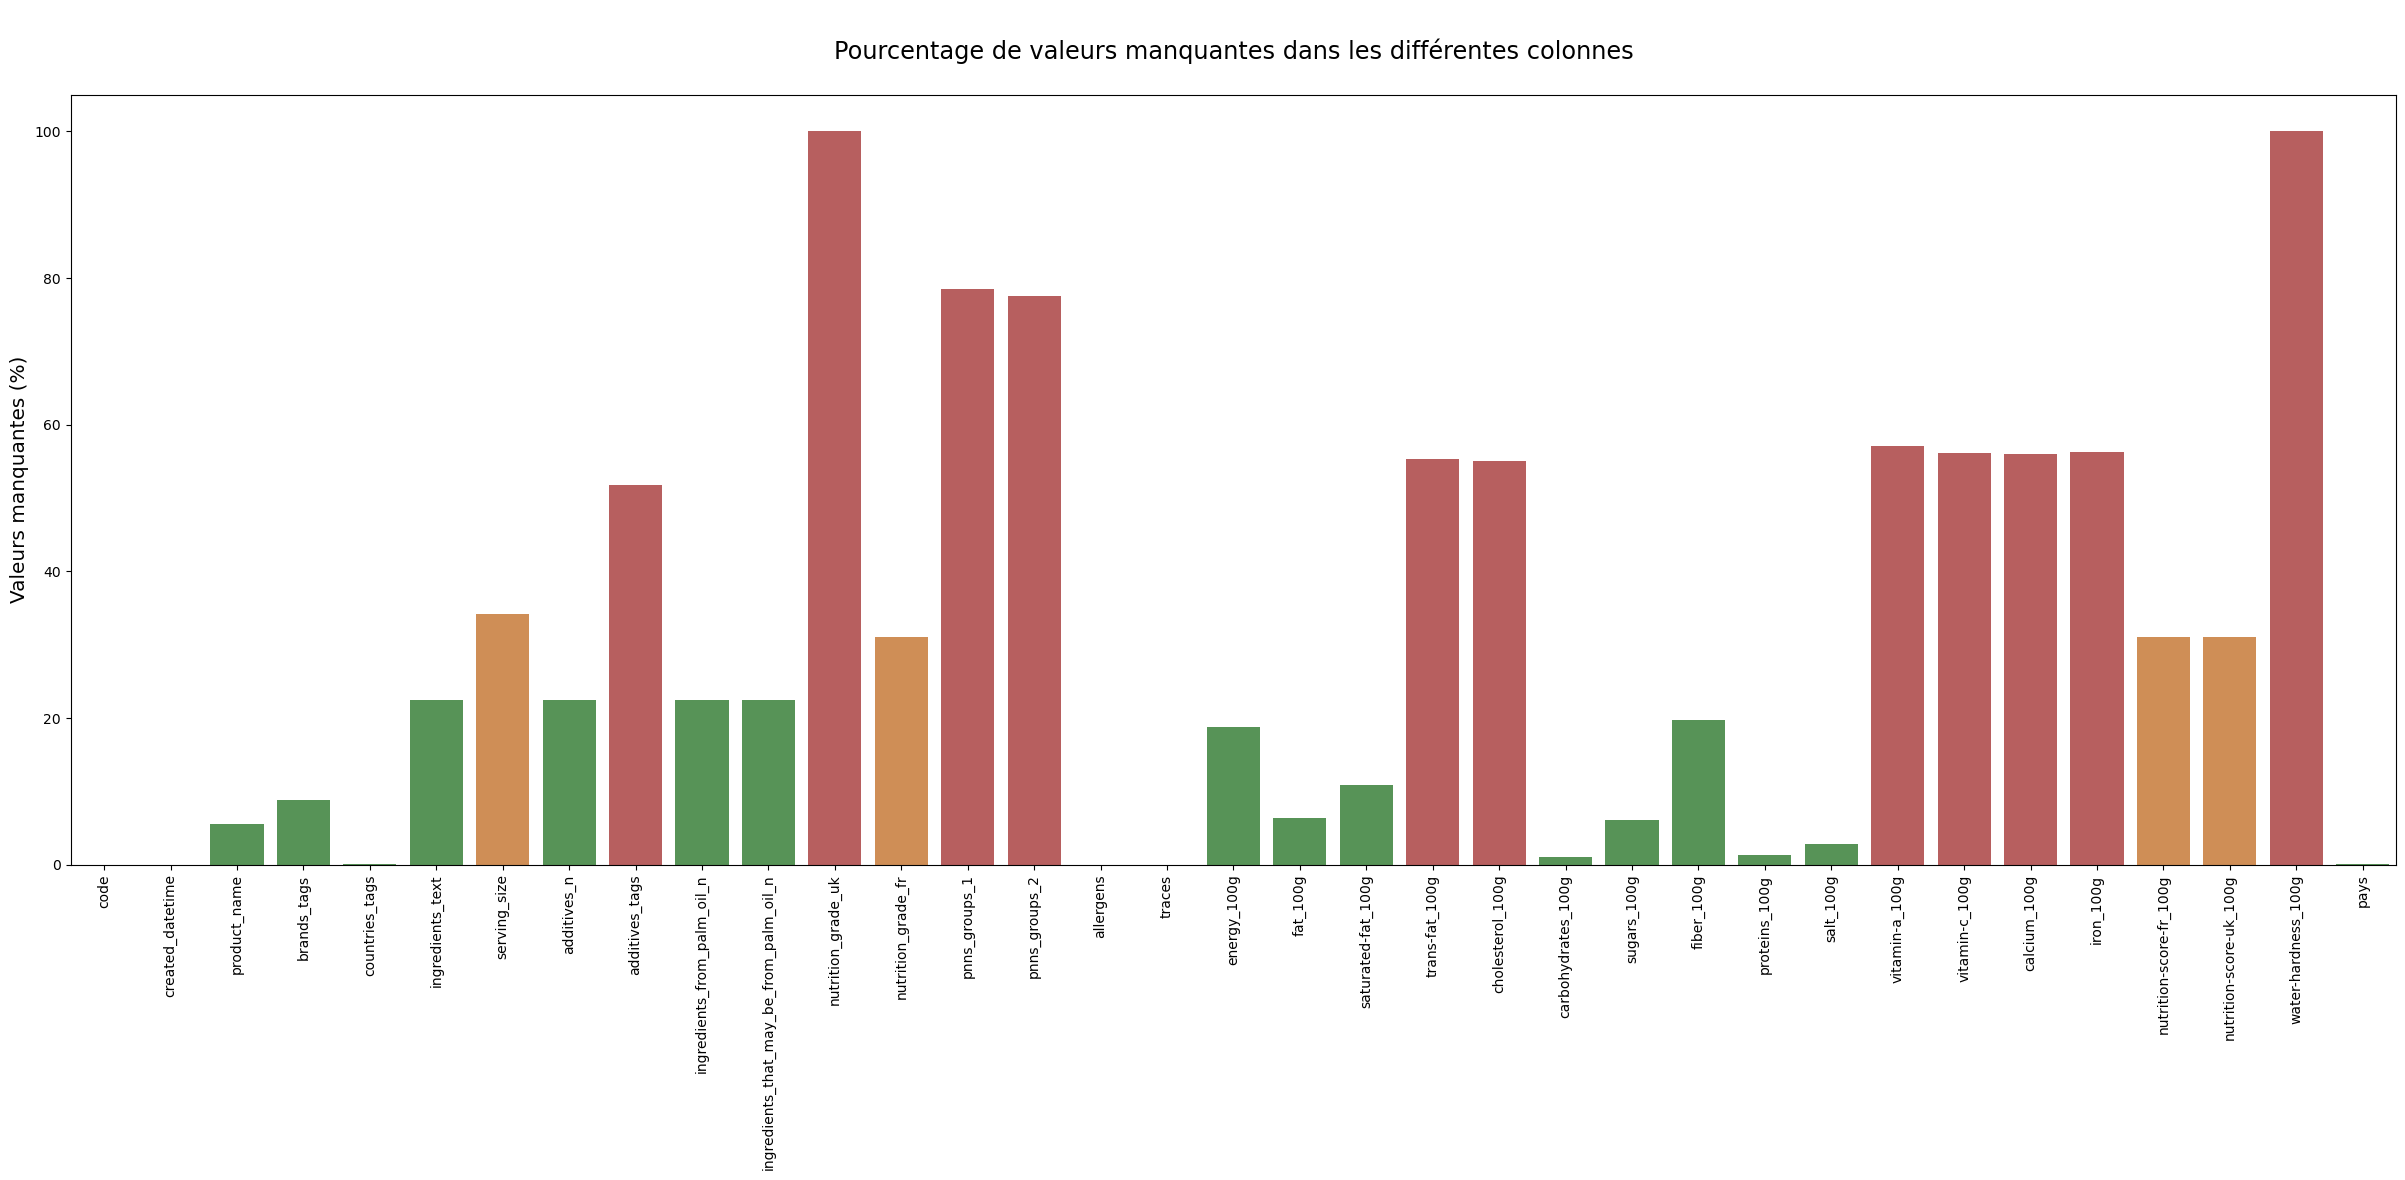

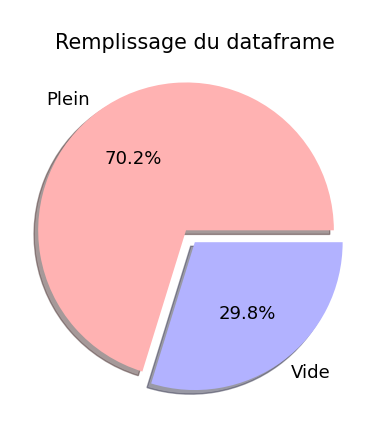


Il y a 11 colonnes avec plus de 50 % de données manquantes.


In [42]:
colonnes_incompletes = data_clean.isna().mean()

fig, ax = plt.subplots(figsize=(30,10))

# Création d'une palette personnalisée
colors = [{p<0.5: '#3A923A', 0.3<=p<=0.5: '#E1812C', p>0.5: '#C03D3E'}[True] for p in colonnes_incompletes.values.tolist()]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x=colonnes_incompletes.index, y=colonnes_incompletes.values*100, alpha = 0.9)

plt.xticks(rotation=90)
ax.set_title('\nPourcentage de valeurs manquantes dans les différentes colonnes\n', fontsize='xx-large')
ax.set_ylabel('Valeurs manquantes (%)', fontsize='x-large')

plt.show()

vide = data_clean.isnull().sum().sum() # Somme de la somme des NaN de chaque colonne
plein = data_clean.notnull().sum().sum() # Somme de la somme des non NaN de chaque colonne

labels = 'Plein', 'Vide'
sizes = [plein, vide]

colors=['#FFB2B2', '#B2B2FF']
explode = (0.1, 0)  # j'explose seulement les allergènes et traces

fig, ax = plt.subplots()
plt.title("\nRemplissage du dataframe", fontsize=15)
ax.pie(sizes, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', colors=colors, textprops={'color':"black", 'fontsize':13});
plt.show()

print("\nIl y a", len(colonnes_incompletes[colonnes_incompletes.values > 0.5]), "colonnes avec plus de 50 % de données manquantes.")